### Context
- According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
- This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status
- Each row in the data provides relavant information about the patient.

### Attribute Information

1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

### Data Source
- Dataset: [kaggle](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset?resource=download)

### Data Importing and Overview

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('Data/healthcare-dataset-stroke-data.csv')

In [3]:
df.head(30)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
def printValueCounts(fields):
    for field in fields:
        print(f"Value counts for {field}:")
        print(df[field].value_counts())
        print()

**NOTES**: Hypertension (high blood pressure) is when the pressure in your blood vessels is too high (140/90 mmHg or higher). It is common but can be serious if not treated. People with high blood pressure may not feel symptoms. The only way to know is to get your blood pressure checked.

[Hypertension - World Health Organization (WHO)](https://www.who.int/news-room/fact-sheets/detail/hypertension#:~:text=Hypertension%20(high%20blood%20pressure)%20is,get%20your%20blood%20pressure%20checked.)

In [6]:
fields = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']

In [7]:
printValueCounts(fields)

Value counts for gender:
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

Value counts for hypertension:
hypertension
0    4612
1     498
Name: count, dtype: int64

Value counts for heart_disease:
heart_disease
0    4834
1     276
Name: count, dtype: int64

Value counts for ever_married:
ever_married
Yes    3353
No     1757
Name: count, dtype: int64

Value counts for work_type:
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

Value counts for Residence_type:
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

Value counts for smoking_status:
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

Value counts for stroke:
stroke
0    4861
1     249
Name: count, dtype: int64



**NOTES:**
What is blood glucose (sugar)?

Glucose (sugar) mainly comes from carbohydrates in the food and drinks you consume. It’s your body’s main source of energy. Your blood carries glucose to all of your body’s cells to use for energy.

Several bodily processes help keep your blood glucose in a healthy range. Insulin, a hormone your pancreas makes, is the most significant contributor to maintaining healthy blood sugar.

If you have elevated blood glucose levels (hyperglycemia), it usually indicates diabetes. Diabetes develops when your pancreas doesn’t make any insulin or enough insulin or your body isn’t responding to the effects of insulin properly.

[Blood Glucose (Sugar) Test](https://my.clevelandclinic.org/health/diagnostics/12363-blood-glucose-test)

**NOTES:** Body mass index (BMI) is a value derived from the mass (weight) and height of a person. The BMI is defined as the body mass divided by the square of the body height, and is expressed in units of kg/m2, resulting from mass in kilograms (kg) and height in metres (m).

[Body mass index](https://en.wikipedia.org/wiki/Body_mass_index)

In [8]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


**NOTES:**
If you had a fasting blood glucose test, a level of 70 to 99 mg/dL (3.9 and 5.5 mmol/L) is considered normal. If you had a random blood glucose test, a normal result depends on when you last ate. Most of the time, the blood glucose level will be 125 mg/dL (6.9 mmol/L) or lower.

[Blood sugar test - blood Information | Mount Sinai - New York](https://www.mountsinai.org/health-library/tests/blood-sugar-test-blood#:~:text=If%20you%20had%20a%20fasting,mmol%2FL\)%20or%20lower.)

**NOTES:** The expected values for normal fasting blood glucose concentration are between 70 mg/dL (3.9 mmol/L) and 100 mg/dL (5.6 mmol/L). When fasting blood glucose is between 100 to 125 mg/dL (5.6 to 6.9 mmol/L) changes in lifestyle and monitoring glycemia are recommended. If fasting blood glucose is 126 mg/dL (7 mmol/L) or higher on two separate tests, diabetes is diagnosed. An individual with low fasting blood glucose concentration (hypoglycemia) – below 70 mg/dL (3.9 mmol/L) – will experience dizziness, sweating, palpitations, blurred vision and other symptoms that have to be monitored. Increased fasting blood glucose concentration (hyperglycemia) is an indicator of a higher risk to diabetes. An individual’s fasting blood plasma glucose (FPG) may be in the normal range because the individual is not diabetic or because of effective treatment with glucose-lowering medication in diabetics. Mean FPG at the national level is used as a proxy for both promotion of healthy diets and behaviours and, treatment of diabetes.

[Mean fasting blood glucose](https://www.who.int/data/gho/indicator-metadata-registry/imr-details/2380#:~:text=The%20expected%20values%20for%20normal,and%20monitoring%20glycemia%20are%20recommended.)

![BMI Range](https://www.cdc.gov/healthyweight/images/assessing/bmi-adult-fb-600x315.jpg?_=07167)

**NOTES:**
To reach a BMI of 90, one would have to have an exceptionally high weight relative to their height, to a degree that is both medically dangerous and likely to result in severe health complications. In practice, such extreme cases are usually associated with significant medical conditions or morbid obesity, and would require urgent medical attention and intervention.

For example, a person who is 1.7 meters (5 feet 7 inches) tall would need to weigh about 259 kilograms (571 pounds) to have a BMI of 90, illustrating the extreme nature of such a measurement. Such weights are rarely observed outside of severe medical scenarios involving complex health issues.

### Data Cleaning

In [9]:
df_cleaned = df.copy()
df_cleaned['bmi'] = df_cleaned['bmi'].fillna(df_cleaned['bmi'].mean())

In [10]:
df_cleaned.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [11]:
df_cleaned.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [12]:
df_cleaned.duplicated().sum()

0

### EDA

#### Univariate Analysis

In [13]:
df_cleaned.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [14]:
df_cleaned['ever_married'] = df_cleaned['ever_married'].apply(lambda x: 1 if x == "Yes" else 0)
df_cleaned.drop(['id'], axis = 1, inplace = True)

<Axes: >

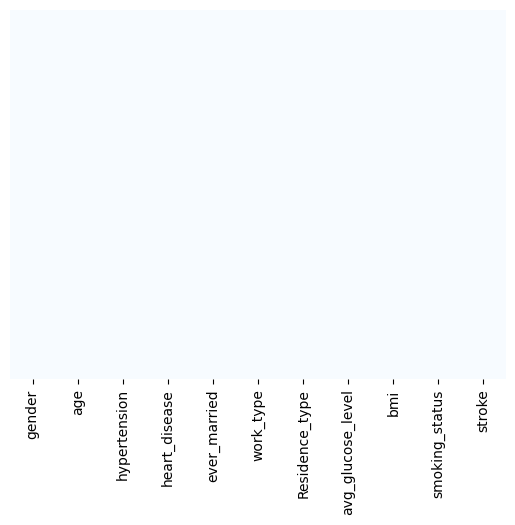

In [15]:
sns.heatmap(df_cleaned.isnull(), yticklabels = False, cbar = False, cmap="Blues")

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'hypertension'}>,
        <Axes: title={'center': 'heart_disease'}>],
       [<Axes: title={'center': 'ever_married'}>,
        <Axes: title={'center': 'avg_glucose_level'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'stroke'}>, <Axes: >, <Axes: >]],
      dtype=object)

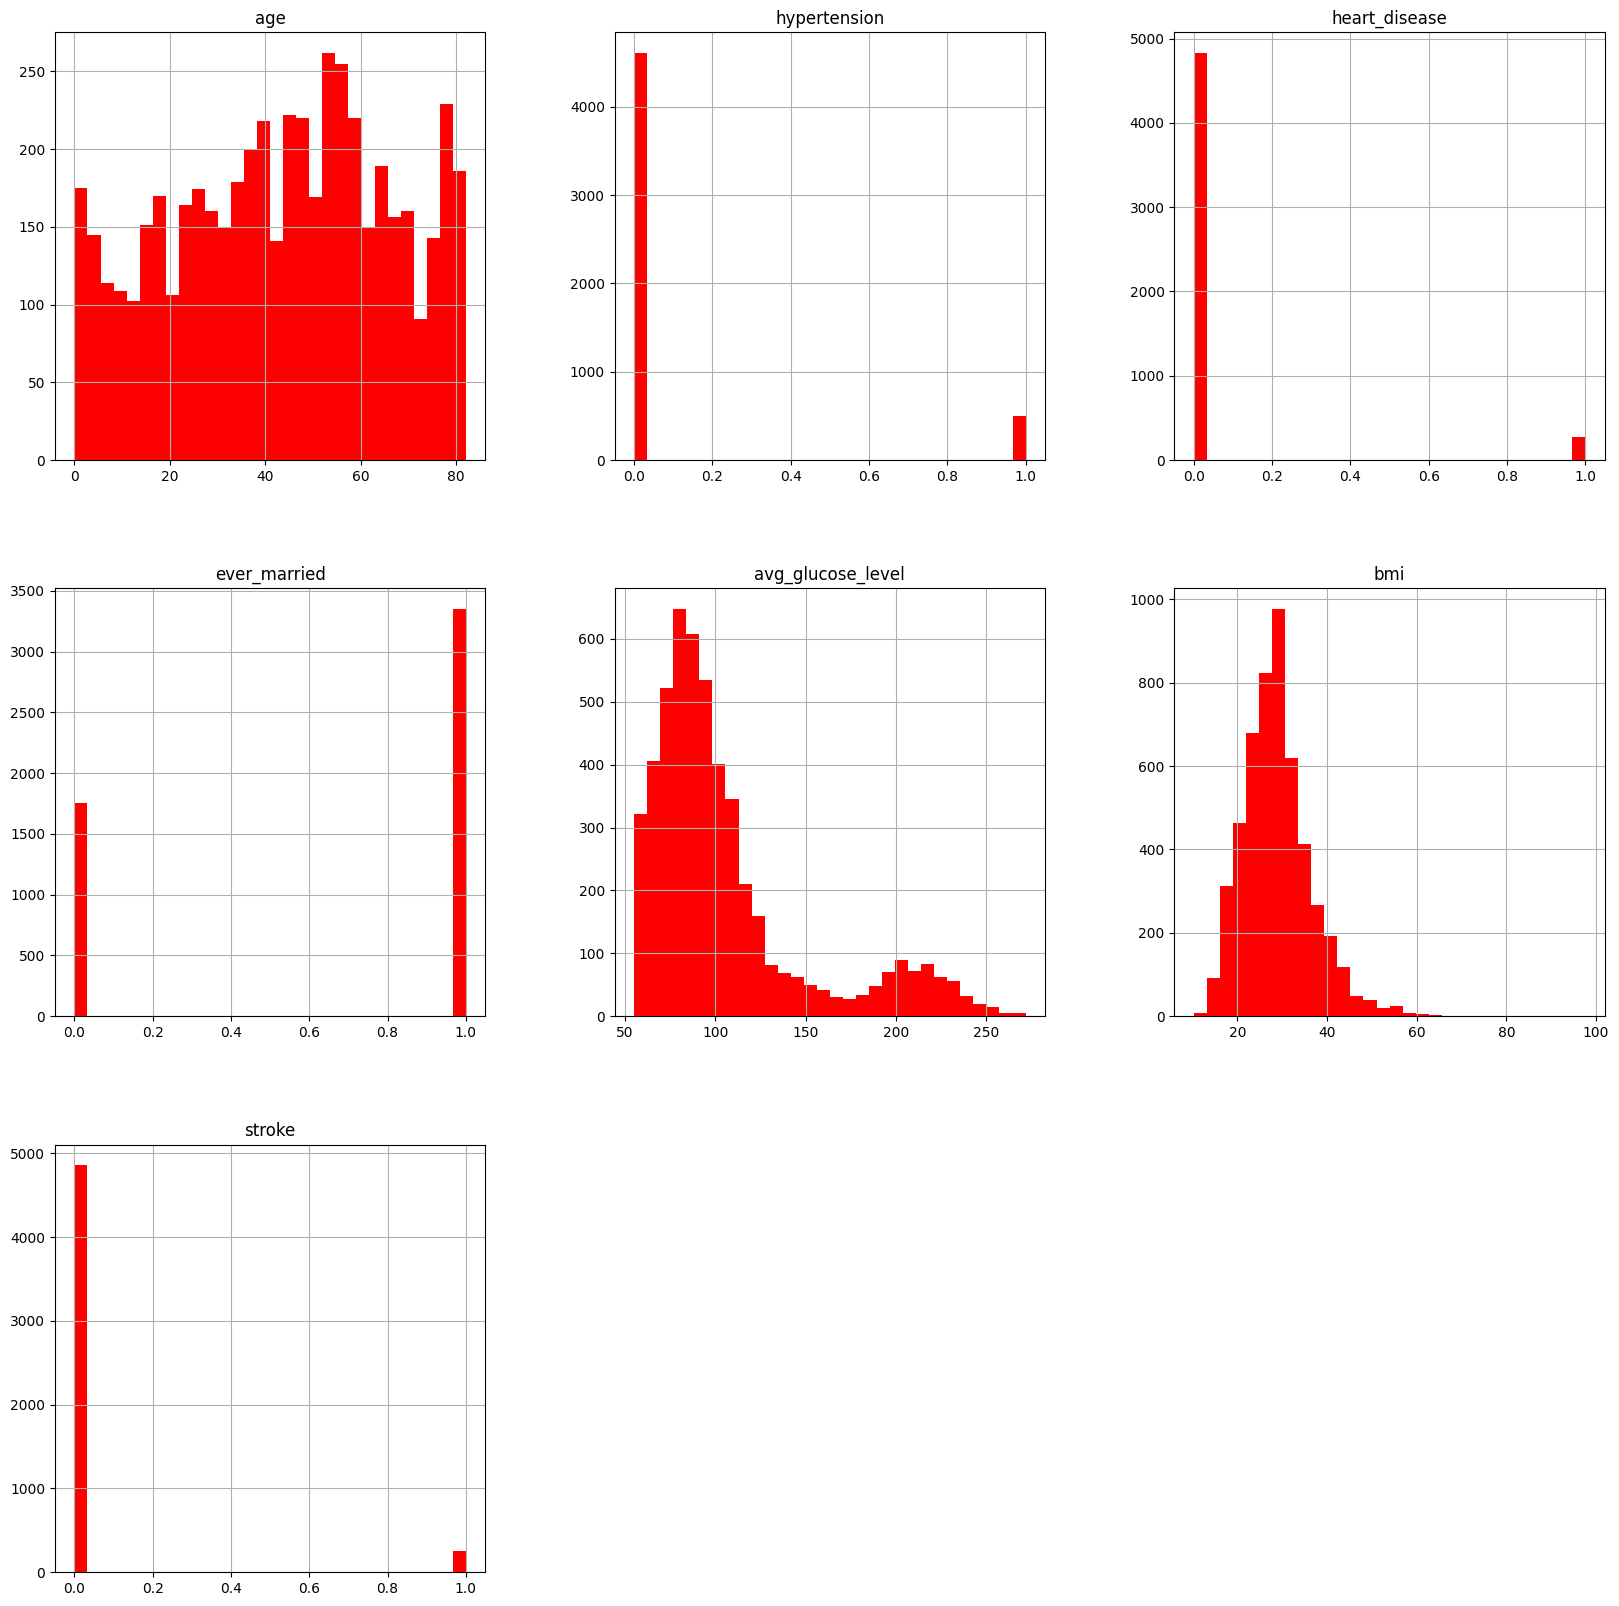

In [16]:
df_cleaned.hist(bins = 30, figsize = (20,20), color = 'r')

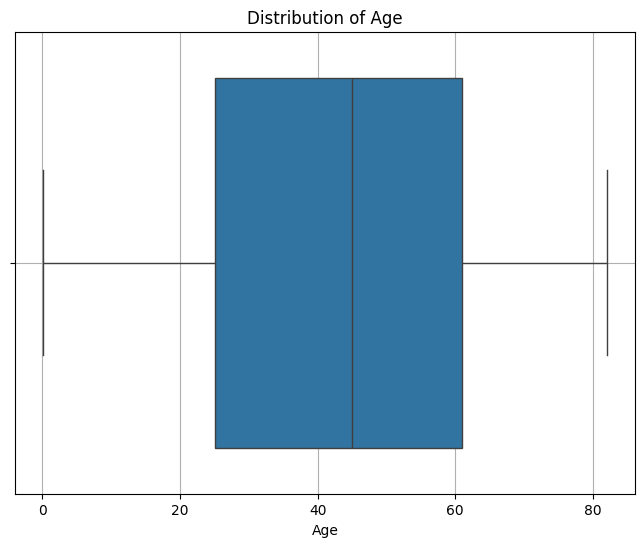

In [17]:
plt.figure(figsize=(8, 6))  # Set the figure size for better visualization
sns.boxplot(x='age', data=df_cleaned)
plt.title('Distribution of Age')  # Adding a title
plt.xlabel('Age')  # Labeling the x-axis
plt.grid(True)  # Adding a grid for easier reading of values
plt.show()


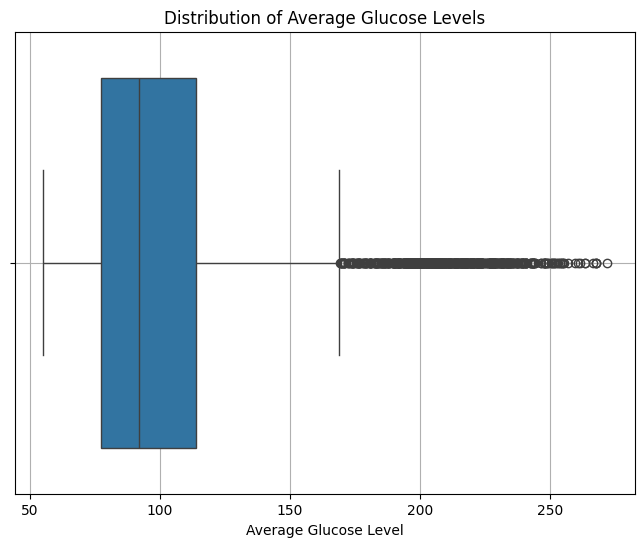

In [18]:
plt.figure(figsize=(8, 6))  # Set the figure size for better visualization
sns.boxplot(x='avg_glucose_level', data=df_cleaned)
plt.title('Distribution of Average Glucose Levels')  # Adding a title
plt.xlabel('Average Glucose Level')  # Labeling the x-axis
plt.grid(True)  # Adding a grid for easier reading of values
plt.show()


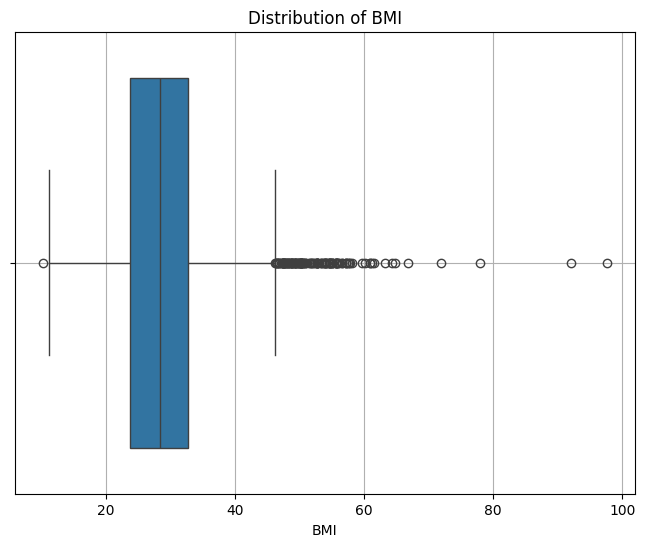

In [19]:
plt.figure(figsize=(8, 6))  # Set the figure size for better visualization
sns.boxplot(x='bmi', data=df_cleaned)
plt.title('Distribution of BMI')  # Adding a title
plt.xlabel('BMI')  # Labeling the x-axis
plt.grid(True)  # Adding a grid for easier reading of values
plt.show()


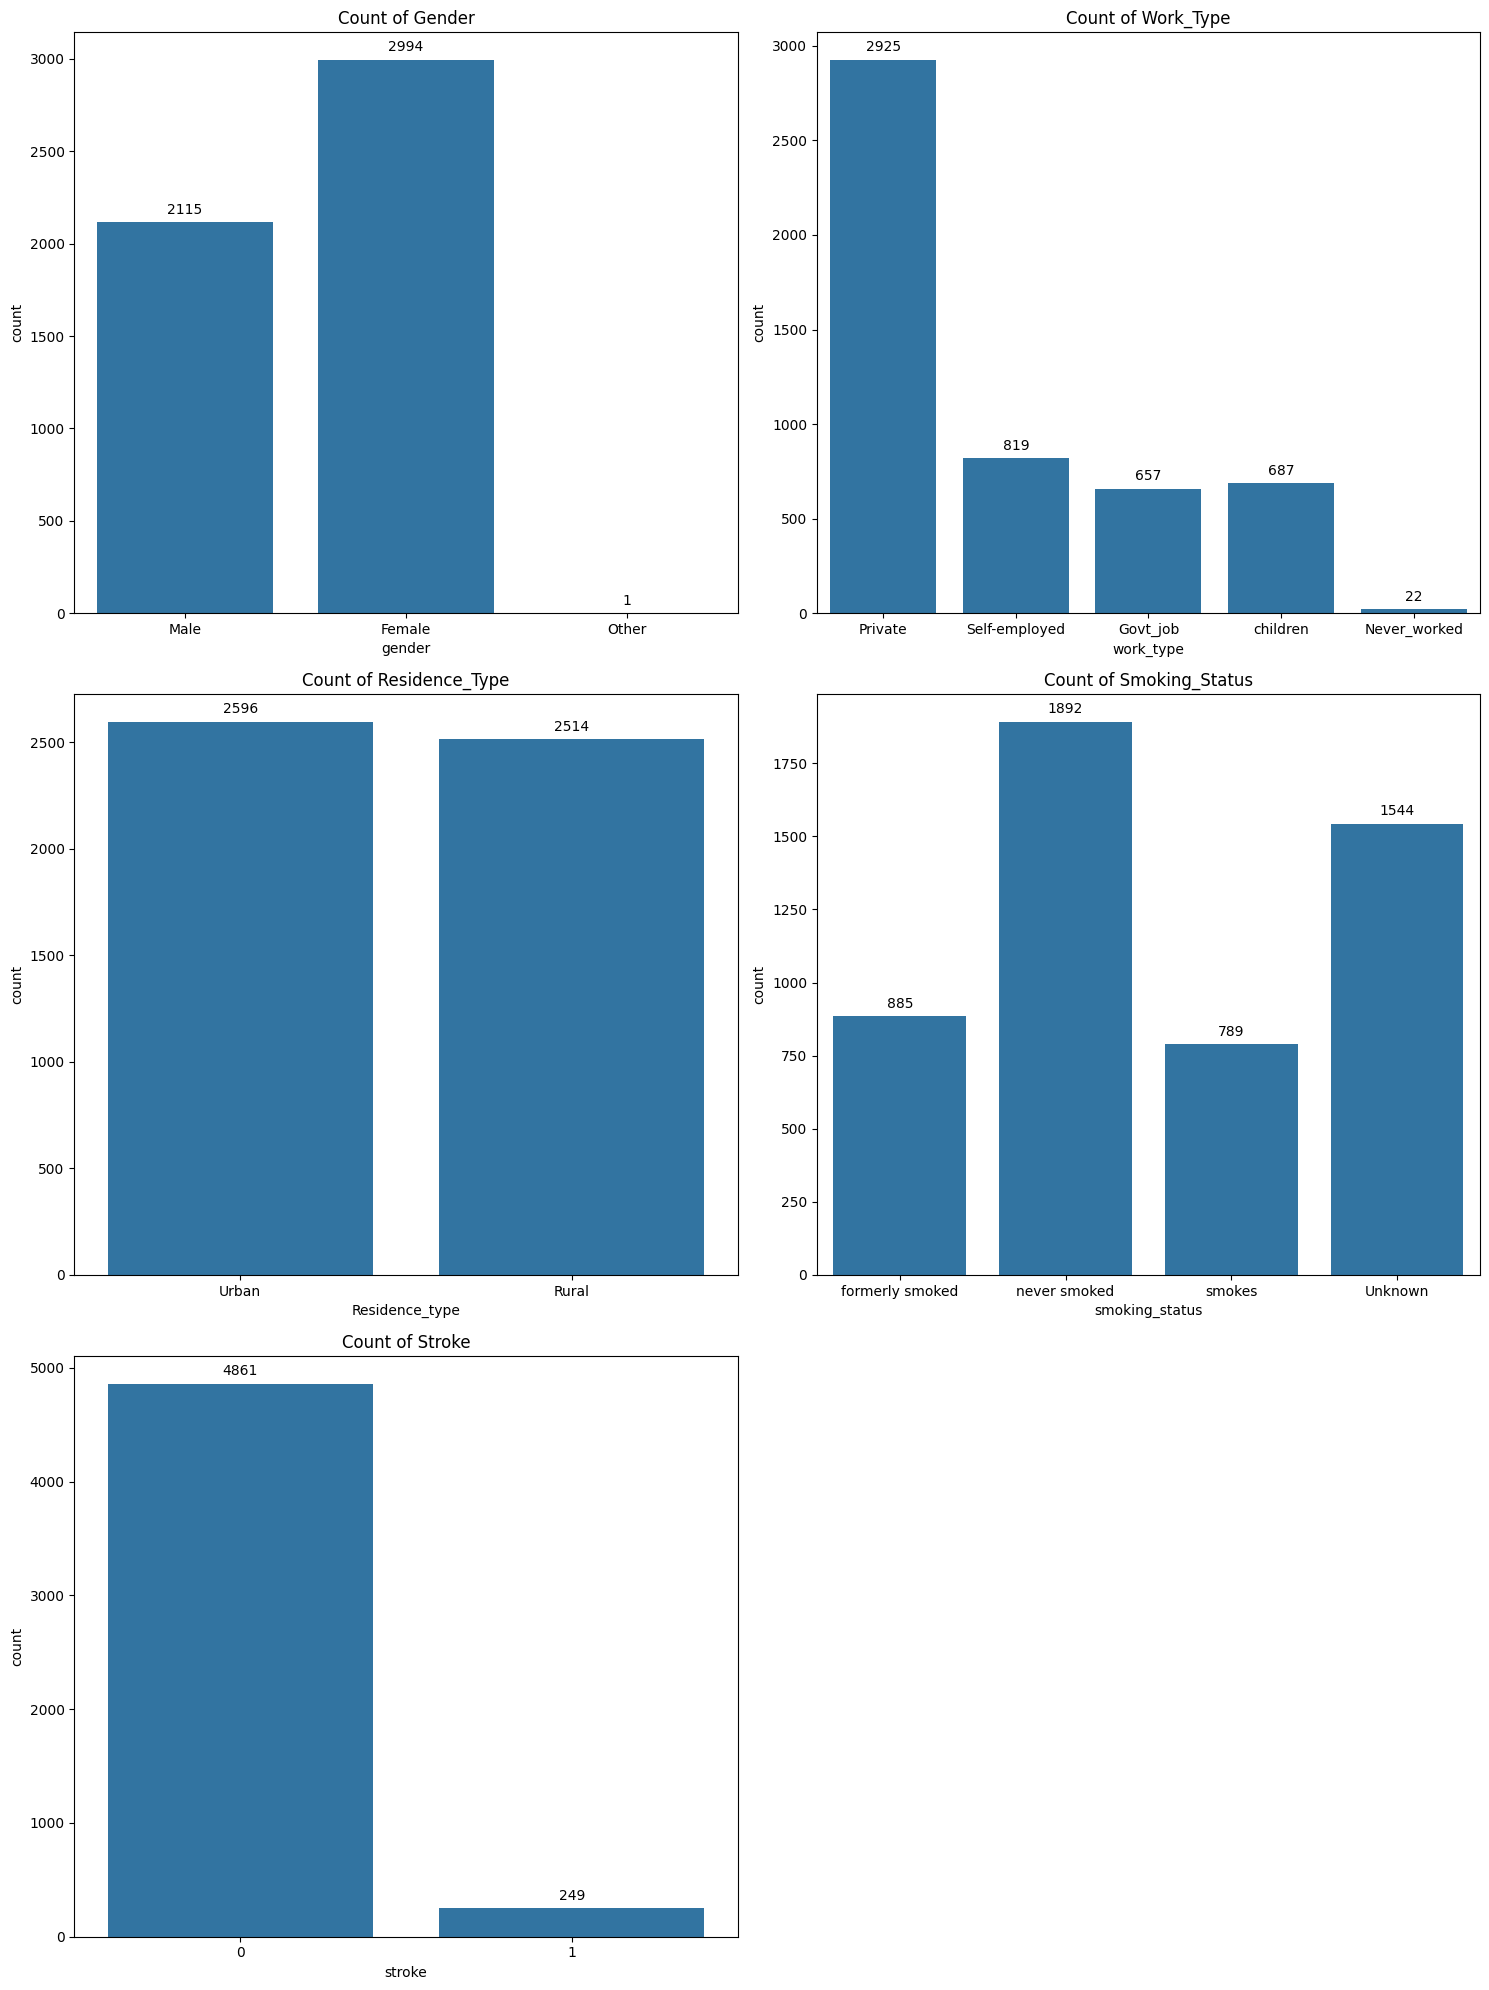

In [20]:
# List of fields to create bar plots for
barplot_fields = ['gender', 'work_type', 'Residence_type', 'smoking_status', 'stroke']

# Assuming df_cleaned is your DataFrame
plt.figure(figsize=(15, 20))  # Adjust the size of the overall figure

# Iterate over the fields, creating a subplot for each
for i, field in enumerate(barplot_fields):
    ax = plt.subplot(3, 2, i + 1)  # Create a subplot in a 2x2 configuration
    sns.countplot(x=field, data=df_cleaned)
    plt.title(f'Count of {field.title()}')

    # Adding text labels on the bars
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),  # Format the count as a string with no decimal places
                    (p.get_x() + p.get_width() / 2., p.get_height()),  # Position for the text
                    ha='center',  # Center alignment
                    va='center',  # Center alignment vertically
                    xytext=(0, 9),  # Position text 9 points above the top of the bar
                    textcoords='offset points')

plt.tight_layout()  # Adjust the layout to make sure everything fits without overlap
plt.show()

##### Univariate Analysis Summary


- **Age Distribution**: The dataset features a relatively uniform age distribution ranging from 0 to 80 years old.
- **Hypertension (High Blood Pressure)**: The majority of the dataset consists of individuals who do not have high blood pressure.
- **Heart Disease**: Similar to high blood pressure, more individuals in the dataset do not have heart diseases compared to those who do.
- **Marital Status**: There are more data points for individuals who have been married at least once than those who have never been married.
- **Blood Glucose and BMI**: Both average blood glucose and BMI are right-skewed, indicating more individuals with lower values and fewer with high values.
- **Stroke Incidence**: The dataset predominantly consists of individuals who have never had a stroke.
- **Gender Distribution**: The gender category is dominated by females, followed by males, and there is only one data point for 'other'.
- **Work Type**: The 'private' category contains the highest number of data points, followed by 'self-employed', 'children', 'government job', and 'never worked', in that descending order.
- **Residence Type**: The dataset is nearly balanced between urban and rural residents, with a slight majority in urban areas.
- **Smoking Status**: 'Never smoked' is the most common status, followed by 'Unknown', 'formerly smoked', and 'smokes', listed in descending order of frequency.

#### Bivariate Analysis

In [21]:
df_cleaned.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,1,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,1,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,1,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,1,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,1,Self-employed,Rural,174.12,24.000000,never smoked,1


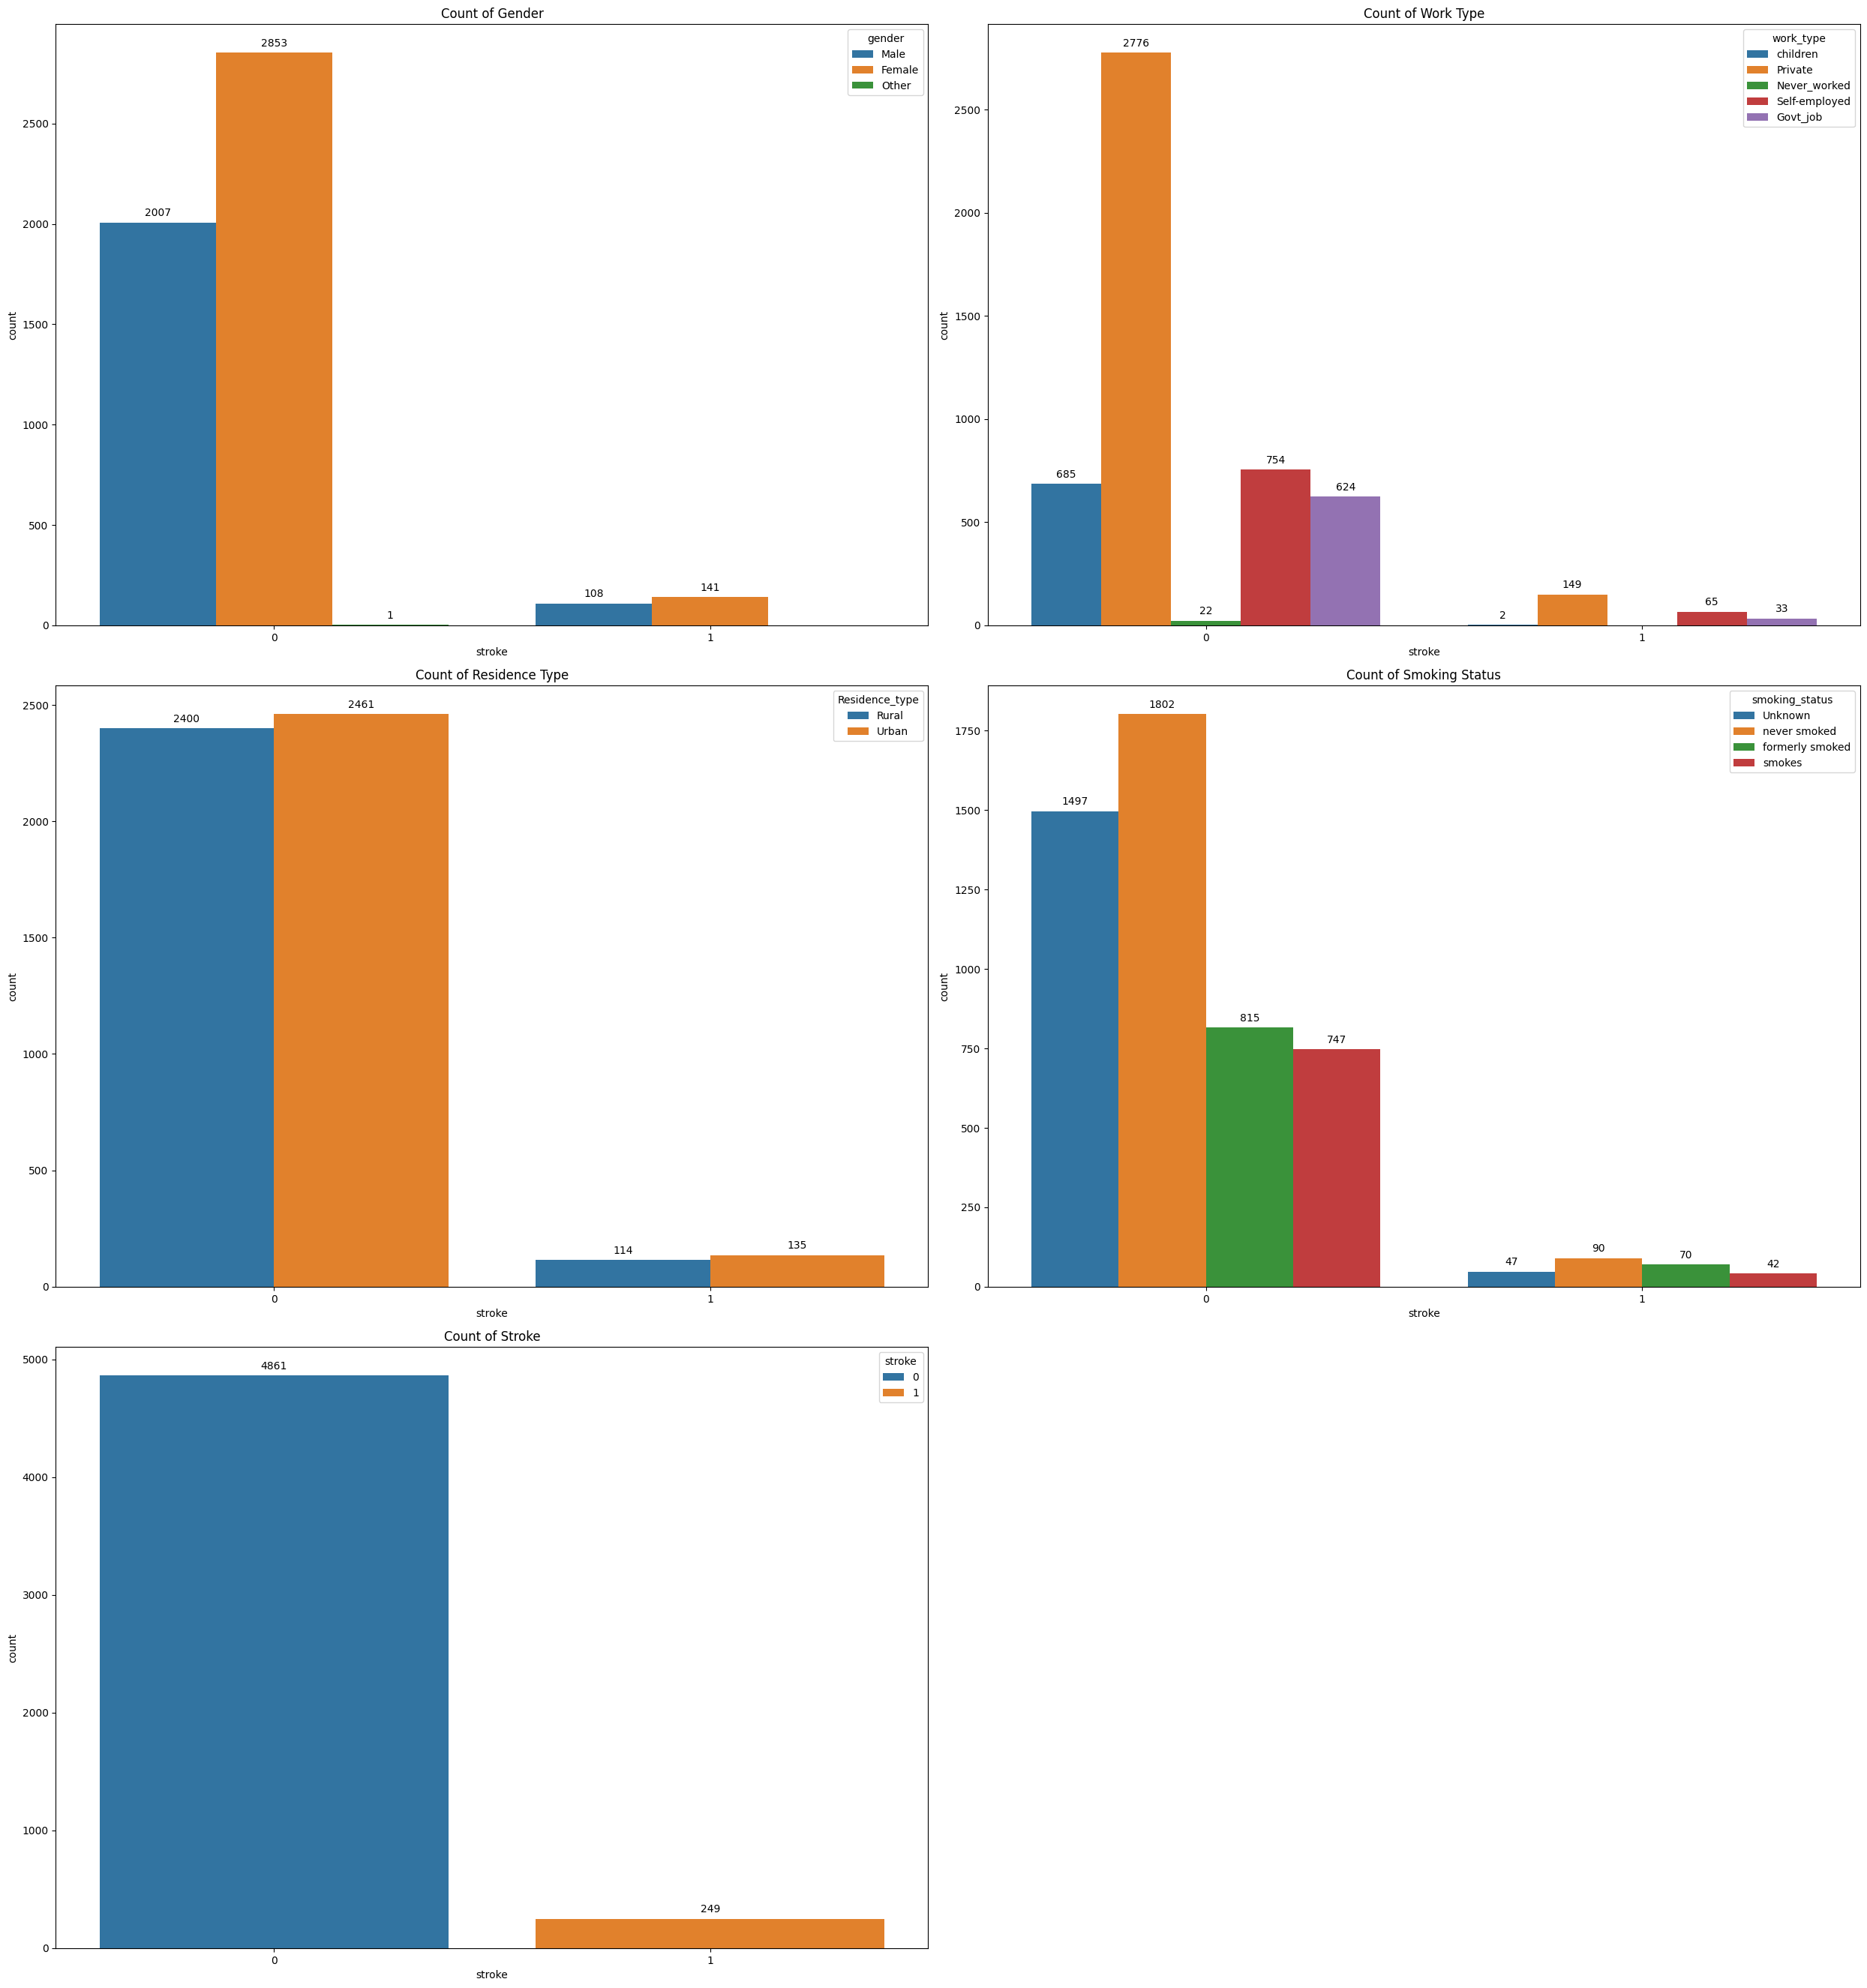

In [22]:
# List of fields for which bar plots will be created
categorical_fields = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Setting the size of the overall figure
plt.figure(figsize=(25, 35))

# Iterating over the fields and creating a subplot for each
for i, field in enumerate(barplot_fields):
    ax = plt.subplot(4, 2, i + 1)  # Creates a subplot in a 2x2 grid
    sns.countplot(data=df_cleaned, x='stroke', hue=field)  # Creates a count plot
    plt.title(f'Count of {field.replace("_", " ").title()}')  # Setting the title with a formatted field name

    # Adding text labels on each bar for better readability
    for p in ax.patches:
        # Formatting and positioning the annotation text
        if p.get_height() > 0:
            ax.annotate(format(p.get_height(), '.0f'),  # Format the count as a string with no decimal places
                        (p.get_x() + p.get_width() / 2., p.get_height()),  # Position for the text
                        ha='center',  # Center alignment
                        va='center',  # Center alignment vertically
                        xytext=(0, 9),  # Position text 9 points above the top of the bar
                        textcoords='offset points')

plt.tight_layout()  # Adjusts the subplots to fit into the figure area.
plt.show()  # Display the figure with the plots


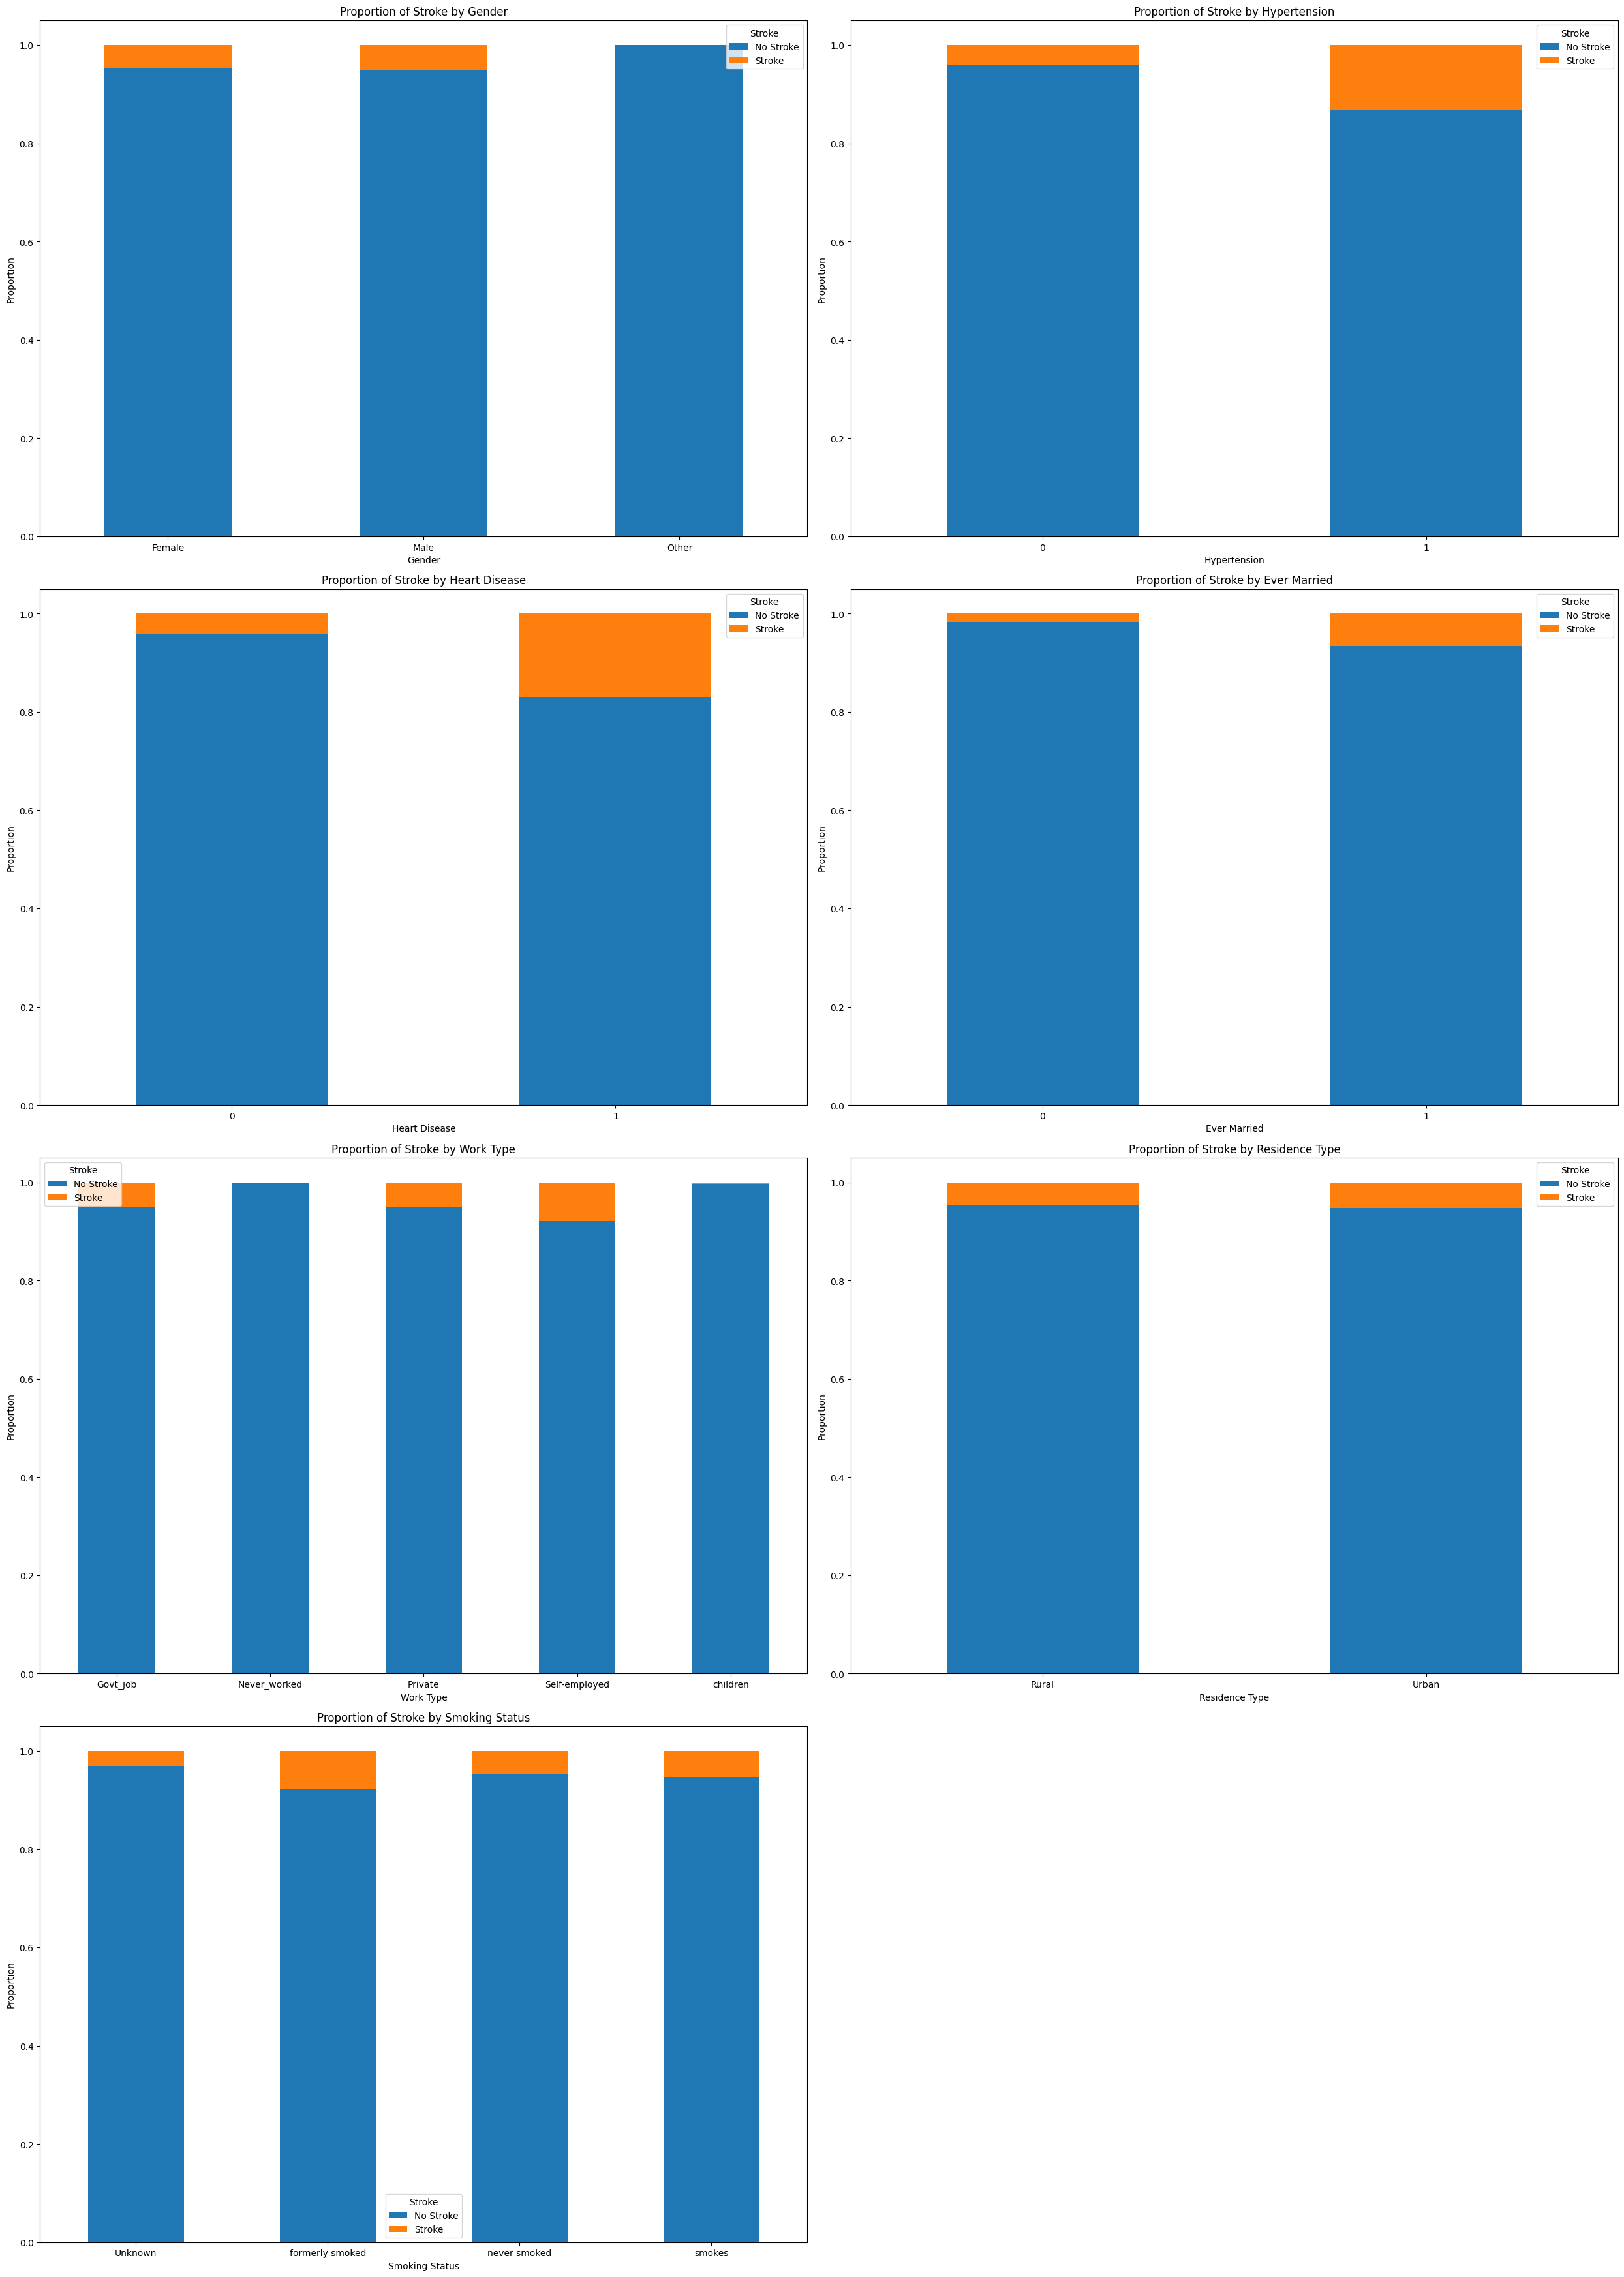

In [23]:
# Assuming df_cleaned is your DataFrame and it includes a 'stroke' column
# and other categorical variables like 'gender', 'hypertension', etc.

# List of categorical variables for which bar plots will be created
categorical_vars = ['gender', 'hypertension', 'heart_disease', 'ever_married', 
                    'work_type', 'Residence_type', 'smoking_status']

# Setting the size of the overall figure
plt.figure(figsize=(25, 35))  # Adjust size to fit all subplots comfortably

# Creating a subplot for each categorical variable
for i, var in enumerate(categorical_vars):
    plt.subplot(4, 2, i + 1)  # Adjust grid size based on the number of variables

    # Calculating proportions
    # Crosstab computes a simple cross-tabulation of two (or more) factors
    """
    pd.crosstab()
        This function is used to compute a cross-tabulation of two (or more) factors. 
        Essentially, it builds a contingency table, which is very useful for categorical data. 
        Here, it is used to count the occurrences of each combination of the categories in var and stroke.

    normalize='index': 
        This parameter tells pd.crosstab() to normalize the data across each row. 
        What this means is that the sum of each row will be 1. This is particularly 
        useful for converting raw counts into proportions, which lets you easily 
        compare categories with different total numbers of observations.
    
    ax=plt.gca(): 
        This argument specifies the matplotlib axes object where the plot should be drawn. 
        plt.gca() gets the current axes, managing where on the figure the plot will appear. 
        This is useful in a subplot configuration to ensure the correct subplot is targeted.
    """
    ct = pd.crosstab(df_cleaned[var], df_cleaned['stroke'], normalize='index')
    ct.plot(kind='bar', stacked=True, ax=plt.gca())  # Plotting directly from pandas DataFrame
    
    plt.title(f'Proportion of Stroke by {var.replace("_", " ").title()}')
    plt.xlabel(var.replace("_", " ").title())
    plt.xticks(rotation = 0)  # Rotate the x-axis labels for better readability
    plt.ylabel('Proportion')
    plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])

plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()


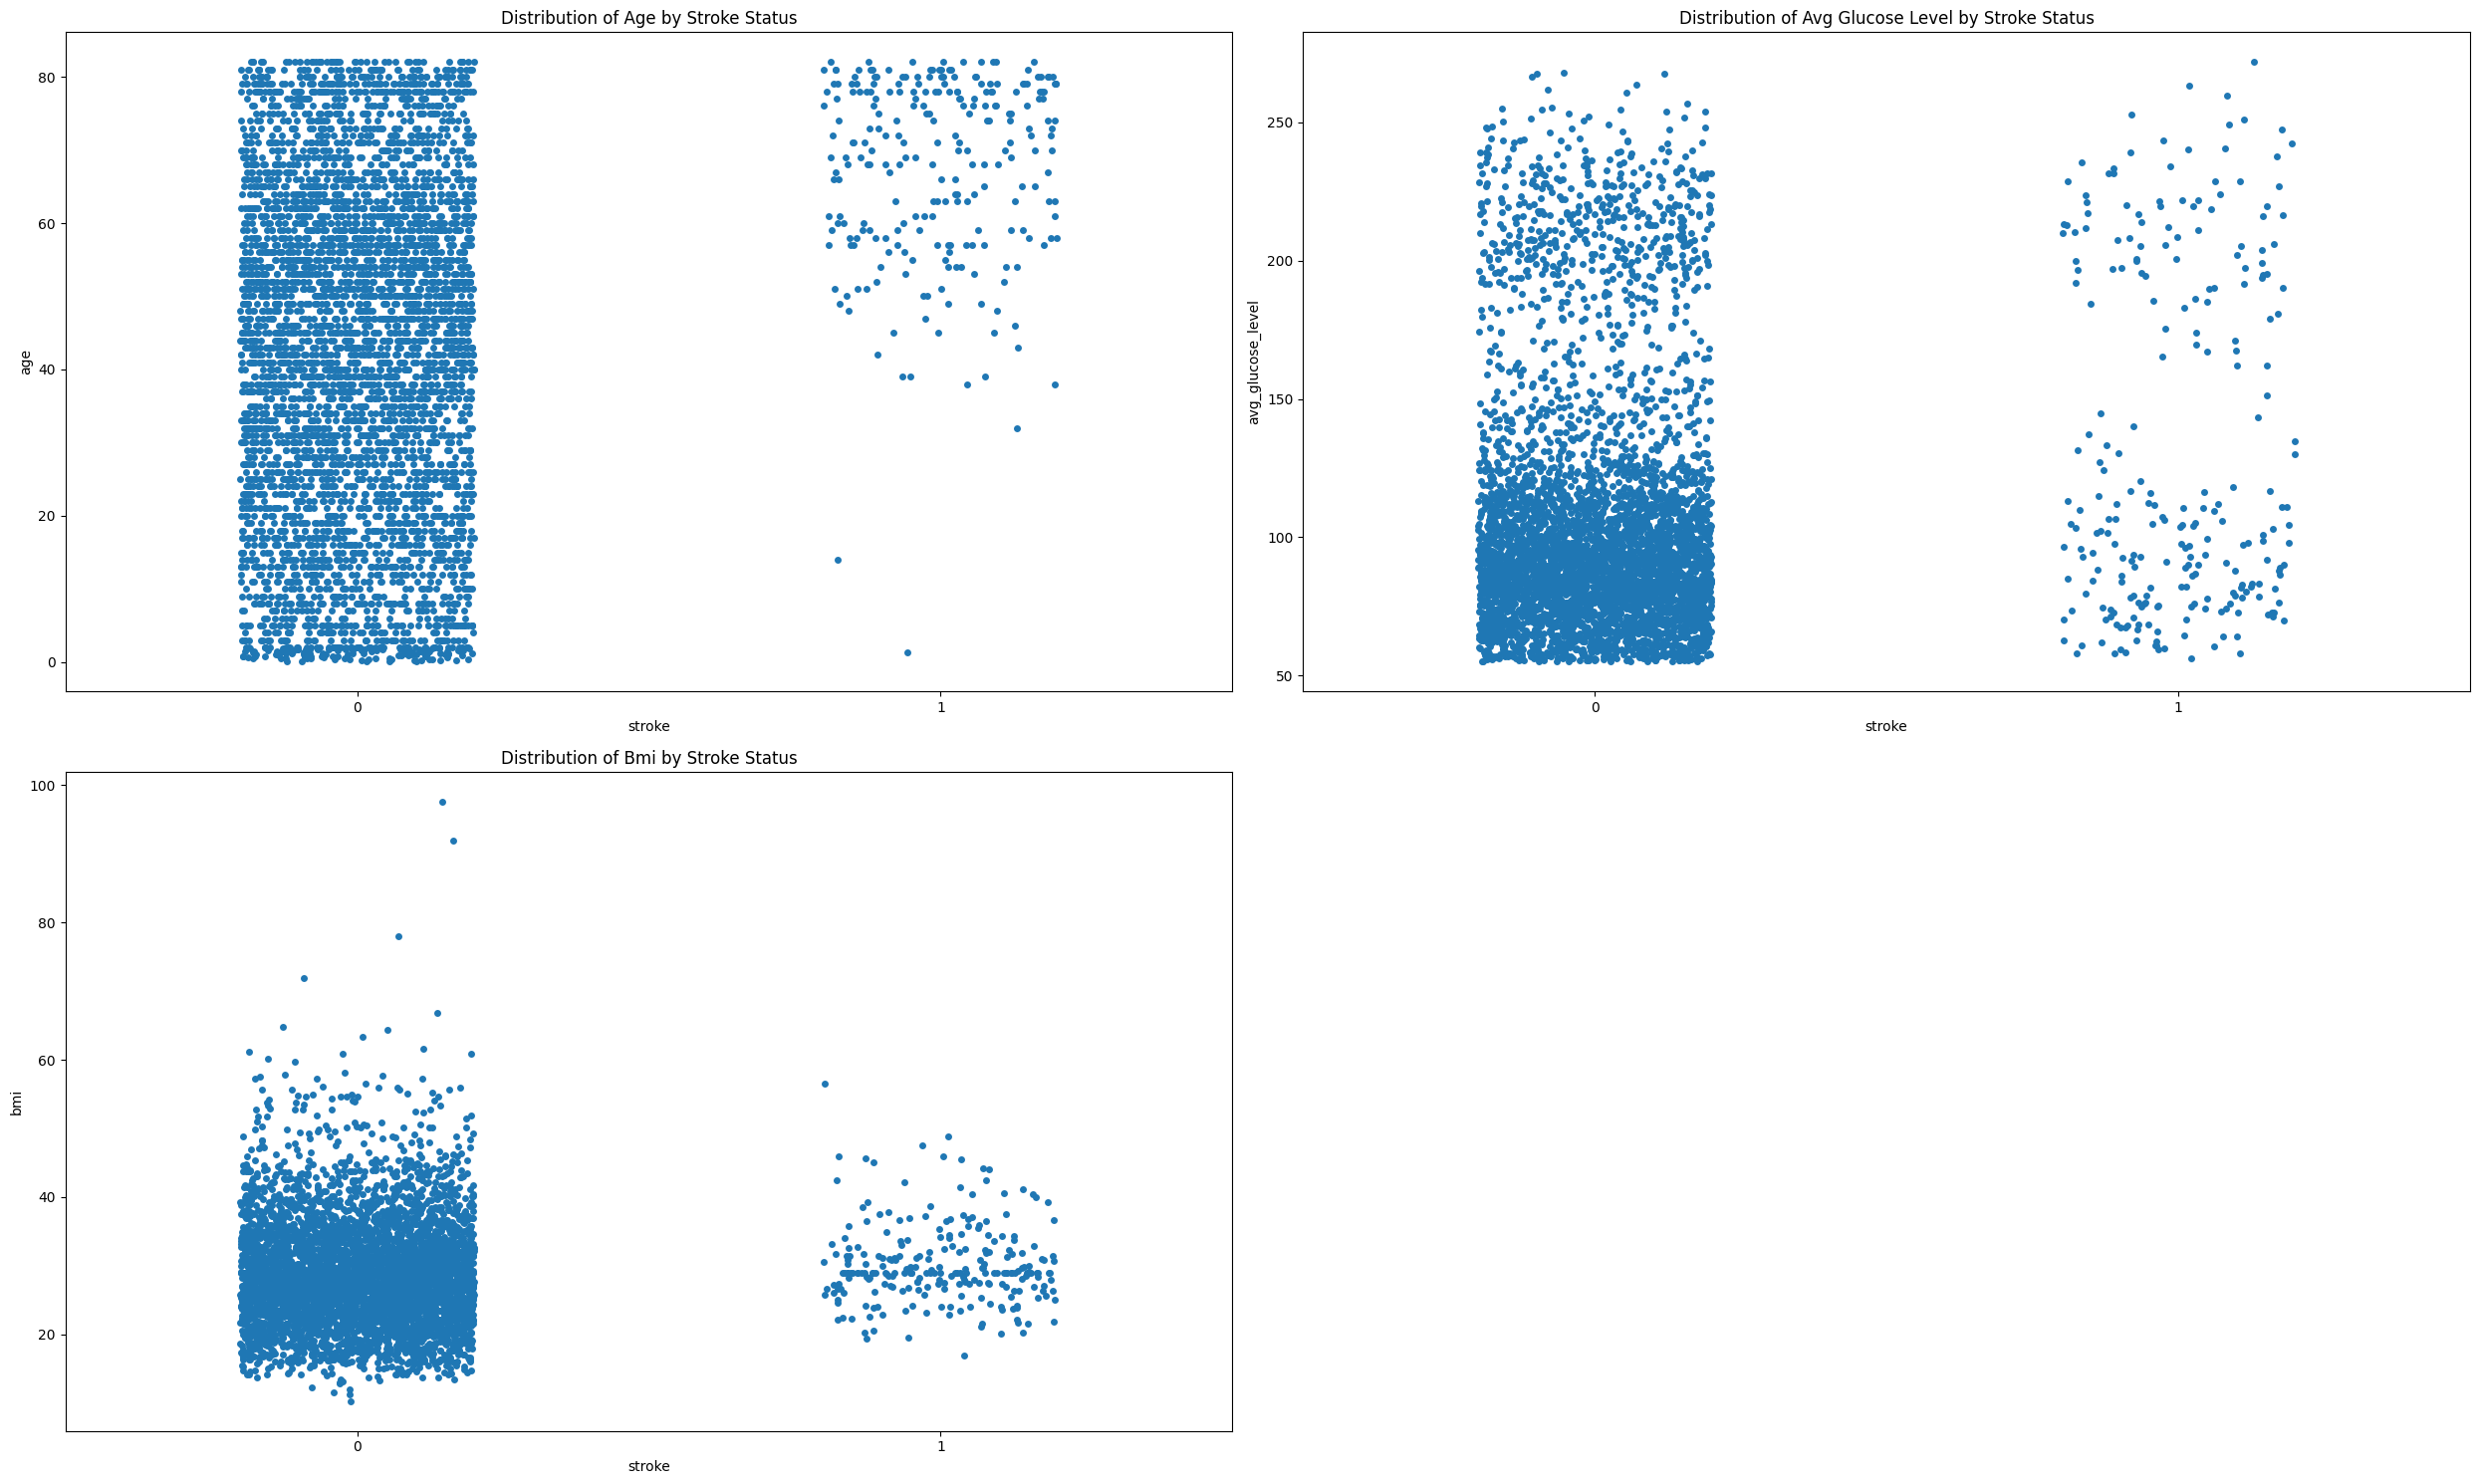

In [24]:
# List of continuous fields to plot against stroke
continuous_fields = ['age', 'avg_glucose_level', 'bmi']

# Setting the size of the overall figure
plt.figure(figsize=(25, 15))  # Adjust size as needed

# Iterating over the continuous fields and creating a subplot for each
for i, field in enumerate(continuous_fields):
    ax = plt.subplot(2, 2, i + 1)  # Adjust subplot layout as needed
    sns.stripplot(x='stroke', y=field, data=df_cleaned, jitter=0.2)  # Creates a strip plot with slight jitter
    plt.title(f'Distribution of {field.replace("_", " ").title()} by Stroke Status')  # Setting the title with a formatted field name

plt.tight_layout()  # Adjusts the subplots to fit into the figure area.
plt.show()  # Display the figure with the plots


**NOTES**: Here's how jitter works:

1. Without Jitter: By default, without jitter, all the points that belong to a single category would align vertically above that category label. This can make it difficult to see the full distribution if many points overlap.
2. With Jitter: When jitter is applied, it randomly adjusts the horizontal position of each point slightly around its central category axis. This spread helps to visualize the density and distribution of the data points within each category, reducing overlap.
    - Amount of Jitter: The value of jitter is a float that determines the magnitude of the adjustment. A larger value spreads the points further apart horizontally, while a smaller value keeps them closer. Sometimes, finding the right amount of jitter requires some trial and error based on the specific dataset and the number of points.
3. Visual Effect: The visual effect of applying jitter is that it can make a dense cloud of overlapping points look more like a "cloud" or "swarm" of points, allowing for a clearer view of how many points are at different levels within the category.

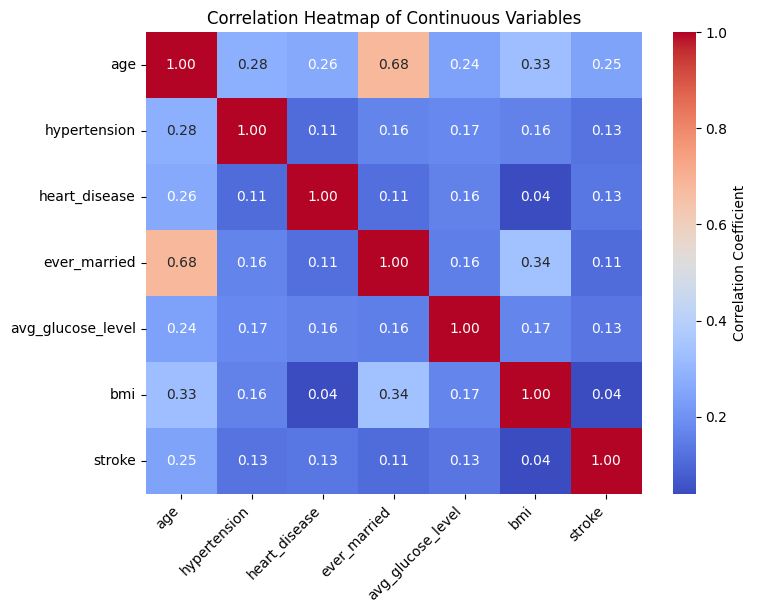

In [25]:
df_continuous = df_cleaned[['age', 'hypertension', 'heart_disease',	'ever_married', 'avg_glucose_level', 'bmi', 'stroke']]

# Calculate the correlation matrix
correlations = df_continuous.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))  # Adjust the figure size to ensure the plot is not too cramped
sns.heatmap(correlations, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Heatmap of Continuous Variables')  # Add a title for clarity
plt.xticks(rotation=45, ha = 'right')  # Rotate the x-axis labels for better readability
plt.yticks(rotation=0)  # Ensure the y-axis labels are horizontal for clarity
plt.show()

##### Bivariate Analysis Summary 

**Categorical Variables vs. Stroke Status**

1. **Gender**:
   - While females make up a larger proportion of the dataset, the relative proportion of stroke incidents among genders is fairly balanced. The 'Other' category has very limited data, making it difficult to draw conclusive insights.

2. **Hypertension**:
   - A significantly higher proportion of individuals with hypertension experience strokes compared to those without hypertension. This suggests a strong relationship between hypertension and the occurrence of stroke.

3. **Heart Disease**:
   - Similar to hypertension, individuals with heart disease have a higher proportion of stroke cases, indicating heart disease as a potential risk factor for stroke.

4. **Ever Married**:
   - Being married is associated with a higher proportion of stroke, possibly correlating with factors like age and social support systems.

5. **Work Type**:
   - Different work types show varying proportions of stroke, with self-employed individuals showing a slightly higher proportion of stroke cases compared to other categories.

6. **Residence Type**:
   - The difference in stroke proportions between urban and rural residents is marginal, suggesting that residence type may not be a significant factor in stroke risk.

7. **Smoking Status**:
   - Former smokers have a noticeably higher proportion of stroke cases compared to never smokers and current smokers, which might indicate the long-term effects of smoking even after cessation.

**Continuous Variables vs. Stroke Status**

1. **Age**:
   - Age distribution indicates that stroke cases are predominantly higher in older age groups, supporting age as a key risk factor for stroke.

2. **Average Glucose Level**:
   - Higher average glucose levels are more prevalent among stroke patients, highlighting glucose management as an important factor in stroke prevention.

3. **BMI**:
   - BMI shows a broad distribution in both stroke and non-stroke categories. However, some higher BMI outliers are more apparent in the stroke category, suggesting a possible link between higher BMI and stroke risk.

**Correlation Analysis**

1. **Strong Correlations**:
   - Age shows significant correlations with several other factors, notably ever married, and moderately with hypertension and heart disease, which are also correlated with stroke.
   - Hypertension and heart disease have moderate correlations with stroke, underlining them as important risk factors.

2. **Moderate Correlations**:
   - Average glucose level and BMI show moderate correlations with age and mild correlations with stroke. This suggests a less direct but still relevant influence on stroke risk.

Chi-Square Test for Independence:

- Purpose: The Chi-Square test is used to determine whether there is a significant association between two categorical variables. In the context of your analysis, it can be used to examine if the distribution of a categorical variable (like smoking status or work type) differs between groups defined by another categorical outcome (like having had a stroke or not).

Hypothesis:
- Null Hypothesis (H0): There is no association between the two categorical variables (the variables are independent).
- Alternative Hypothesis (H1): There is an association between the two categorical variables (the variables are not independent).

T-Tests and ANOVA:

- T-Tests: Used to compare the means of a numerical variable between two groups. For your study, you might use a t-test to compare the mean age or glucose levels of individuals who have had a stroke versus those who haven't.

- ANOVA (Analysis of Variance): If you have more than two groups (e.g., comparing glucose levels across multiple age categories), ANOVA is used to determine if there is a significant difference in the means among the groups.

Hypothesis:
- Null Hypothesis (H0): The means of the groups are equal.
- Alternative Hypothesis (H1): At least one group mean is different from the others.

#### Statistical Test

In [35]:
from scipy.stats import chi2_contingency

def chi2Test(variable):
    # Creating a contingency table
    contingency_table = pd.crosstab(df_cleaned[variable], df_cleaned['stroke'])

    # Performing the chi-square test
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)

    print(variable)
    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p_value}")
    print(f"Degrees of freedom: {dof}")
    print("Expected frequencies:\n", expected)
    print()

In [36]:
for field in categorical_fields:
    chi2Test(field)

gender
Chi-square statistic: 0.47258662884530234
P-value: 0.7895490538408245
Degrees of freedom: 2
Expected frequencies:
 [[2.84810841e+03 1.45891585e+02]
 [2.01194031e+03 1.03059687e+02]
 [9.51272016e-01 4.87279843e-02]]

hypertension
Chi-square statistic: 81.6053682482931
P-value: 1.661621901511823e-19
Degrees of freedom: 1
Expected frequencies:
 [[4387.2665362  224.7334638]
 [ 473.7334638   24.2665362]]

heart_disease
Chi-square statistic: 90.25956125843324
P-value: 2.088784568522923e-21
Degrees of freedom: 1
Expected frequencies:
 [[4598.44892368  235.55107632]
 [ 262.55107632   13.44892368]]

ever_married
Chi-square statistic: 58.923890259034195
P-value: 1.6389021142314754e-14
Degrees of freedom: 1
Expected frequencies:
 [[1671.38493151   85.61506849]
 [3189.61506849  163.38493151]]

work_type
Chi-square statistic: 49.163511976675295
P-value: 5.397707801896119e-10
Degrees of freedom: 4
Expected frequencies:
 [[6.24985714e+02 3.20142857e+01]
 [2.09279843e+01 1.07201566e+00]
 [2.782

In [37]:
from scipy.stats import ttest_ind

def tTest(variable):
# Splitting the groups
    group1 = df_cleaned[df_cleaned['stroke'] == 1][variable]
    group2 = df_cleaned[df_cleaned['stroke'] == 0][variable]

    # Performing the t-test
    t_stat, p_value = ttest_ind(group1, group2, equal_var=False)  # Assuming variances are not equal

    print(variable)
    print(f"T-statistic: {t_stat}")
    print(f"P-value: {p_value}")
    print()

In [38]:
for field in continuous_fields:
    tTest(field)

age
T-statistic: 29.68626563006023
P-value: 2.115684848347272e-95

avg_glucose_level
T-statistic: 6.982411744792963
P-value: 2.4014366563697676e-11

bmi
T-statistic: 3.6104224993610305
P-value: 0.0003590568859291078



### Transform Data for ML

In [26]:
df_cleaned.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,1,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,1,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,1,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,1,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,1,Self-employed,Rural,174.12,24.000000,never smoked,1


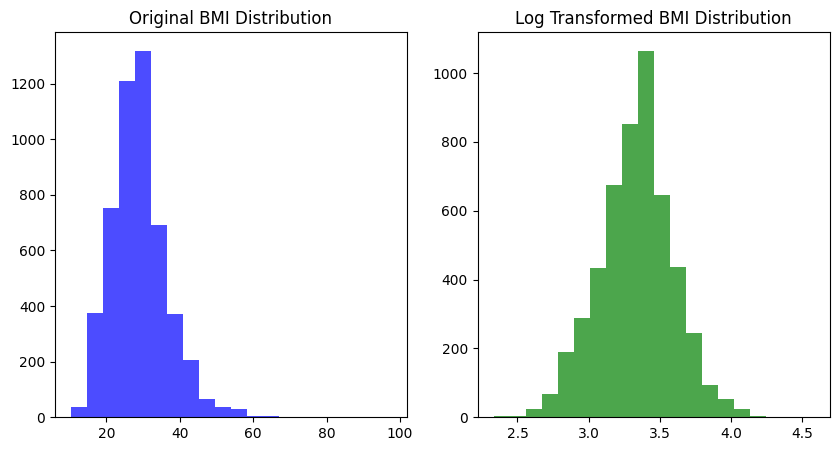

In [27]:
# Applying log transformation using numpy
df_cleaned['log_bmi'] = np.log(df_cleaned['bmi'])

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(df_cleaned['bmi'], bins=20, color='blue', alpha=0.7)
plt.title('Original BMI Distribution')

plt.subplot(1, 2, 2)
plt.hist(df_cleaned['log_bmi'], bins=20, color='green', alpha=0.7)
plt.title('Log Transformed BMI Distribution')

plt.show()

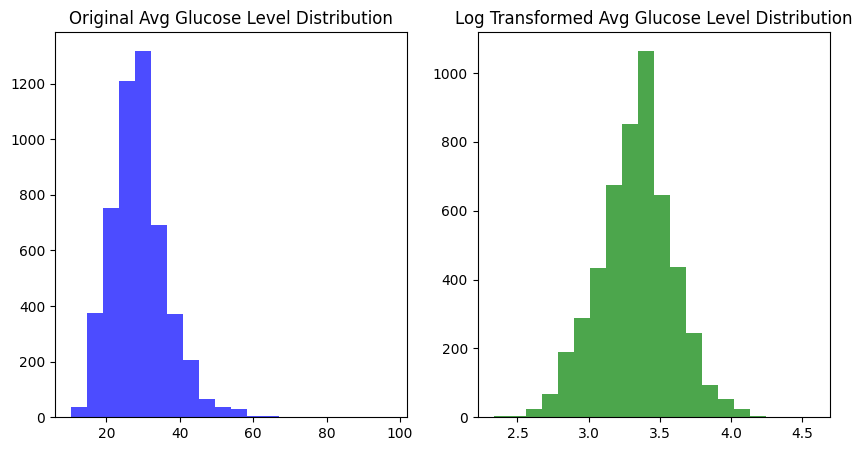

In [28]:
# Applying log transformation using numpy
df_cleaned['log_avg_glucose_level'] = np.log(df_cleaned['avg_glucose_level'])

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(df_cleaned['bmi'], bins=20, color='blue', alpha=0.7)
plt.title('Original Avg Glucose Level Distribution')

plt.subplot(1, 2, 2)
plt.hist(df_cleaned['log_bmi'], bins=20, color='green', alpha=0.7)
plt.title('Log Transformed Avg Glucose Level Distribution')

plt.show()


In [29]:
df_transformed = pd.get_dummies(df_cleaned, drop_first = True)

In [30]:
df_transformed.head()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,log_bmi,log_avg_glucose_level,gender_Male,gender_Other,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,1,228.69,36.600000,1,3.600048,5.432367,True,False,False,True,False,False,True,True,False,False
1,61.0,0,0,1,202.21,28.893237,1,3.363608,5.309307,False,False,False,False,True,False,False,False,True,False
2,80.0,0,1,1,105.92,32.500000,1,3.481240,4.662684,True,False,False,True,False,False,False,False,True,False
3,49.0,0,0,1,171.23,34.400000,1,3.538057,5.143008,False,False,False,True,False,False,True,False,False,True
4,79.0,1,0,1,174.12,24.000000,1,3.178054,5.159745,False,False,False,False,True,False,False,False,True,False


In [31]:
X = df_transformed.drop(['avg_glucose_level', 'bmi', 'stroke'], axis=1)
y = df_transformed['stroke']

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

### Machine Learning

#### Logistic Regression: Info, Train & Evaluate

##### Info
[Logistic Regression](https://www.geeksforgeeks.org/understanding-logistic-regression/)


![How does Logistic Regression work?](Images/Logistic_Regression.png)

![How does Logistic Regression work?](Images/Logistic_Regression2.png)

**Types of Logistic Regression**

On the basis of the categories, Logistic Regression can be classified into three types:

1. Binomial: In binomial Logistic regression, there can be only two possible types of the dependent variables, such as 0 or 1, Pass or Fail, etc.
2. Multinomial: In multinomial Logistic regression, there can be 3 or more possible unordered types of the dependent variable, such as “cat”, “dogs”, or “sheep”
3. Ordinal: In ordinal Logistic regression, there can be 3 or more possible ordered types of dependent variables, such as “low”, “Medium”, or “High”.

**Assumptions of Logistic Regression**

We will explore the assumptions of logistic regression as understanding these assumptions is important to ensure that we are using appropriate application of the model. The assumption include:

1. Independent observations: Each observation is independent of the other. meaning there is no correlation between any input variables.
2. Binary dependent variables: It takes the assumption that the dependent variable must be binary or dichotomous, meaning it can take only two values. For more than two categories SoftMax functions are used.
3. Linearity relationship between independent variables and log odds: The relationship between the independent variables and the log odds of the dependent variable should be linear.
4. No outliers: There should be no outliers in the dataset.
5. Large sample size: The sample size is sufficiently large

**Logistic Regression (Binomial Logistic Regression)**

Logistic regression, also known as Binomial Logistic Regression, utilizes the sigmoid function to map inputs (which can range from -infinity to +infinity) to output probabilities.

**Advantages of Logistic Regression**

- **Ease of Implementation and Interpretation**: Logistic regression is straightforward to implement, interpret, and very efficient to train.
- **No Assumptions on Class Distributions**: It does not assume any specific distributions of classes in feature space.
- **Extendibility to Multiclass Problems**: It can be easily extended to multiple classes (multinomial regression) and provides a natural probabilistic view of class predictions.
- **Insightful Coefficient Interpretation**: Provides insights on how appropriate a predictor is, along with the direction of association (positive or negative).
- **Speed**: It classifies unknown records very quickly.
- **Good Accuracy for Simple Datasets**: Performs well when the dataset is linearly separable.
- **Coefficient Interpretation and Feature Importance**: Model coefficients can be interpreted as indicators of feature importance.
- **Less Prone to Overfitting**: While logistic regression is less inclined to overfit, it can still overfit in high-dimensional datasets. Regularization techniques (L1 and L2) can be used to help prevent this.

**Disadvantages of Logistic Regression**

- **Overfitting in Certain Conditions**: Should not be used if the number of observations is less than the number of features, as it may lead to overfitting.
- **Linear Boundaries**: Constructs linear boundaries, which may be a limitation for certain datasets.
- **Assumption of Linearity**: The major limitation is the assumption of linearity between the dependent variable and the independent variables.
- **Limited to Discrete Functions**: Can only be used to predict discrete functions, hence the dependent variable is bound to a discrete number set.
- **Incapability to Solve Non-linear Problems**: Non-linear problems cannot be solved with logistic regression because it has a linear decision surface, which is rarely found in real-world scenarios.
- **Requirement of Little or No Multicollinearity**: Requires little or no multicollinearity between independent variables.
- **Difficulty in Modeling Complex Relationships**: It is tough to obtain complex relationships using logistic regression, and more powerful algorithms such as neural networks can easily outperform this algorithm.
- **Linear Relation to Log Odds**: In logistic regression, independent variables need to be linearly related to the log odds (log(p/(1-p))).

##### Train & Evaluate


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [34]:
X_train.shape

(3832, 16)

In [35]:
X_test.shape

(1278, 16)

In [36]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [37]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [38]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

print("Accuracy {} %".format( 100 * accuracy_score(y_pred, y_test)))


Accuracy 93.74021909233177 %


<Axes: >

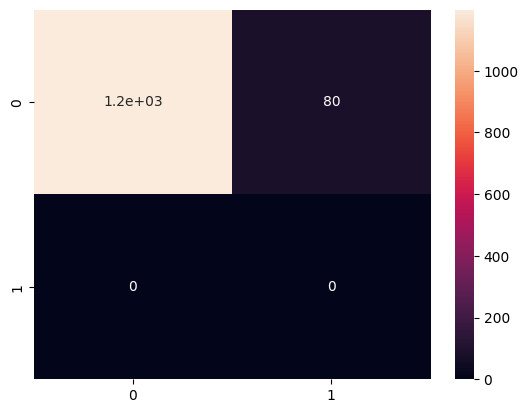

In [39]:
# Testing Set Performance
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)


In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1198
           1       0.00      0.00      0.00        80

    accuracy                           0.94      1278
   macro avg       0.47      0.50      0.48      1278
weighted avg       0.88      0.94      0.91      1278



/opt/miniconda3/envs/DSProjects/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/envs/DSProjects/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/envs/DSProjects/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

In [41]:
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
    model_name (string): Your choice: how the model will be named in the output table
    preds: numpy array of test predictions
    y_test_data: numpy array of y_test data

    Out:
    table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy]
                        })

    return table

In [42]:
# Get scores on test data
results = get_test_scores('Logistic test', y_pred, y_test)
results

/opt/miniconda3/envs/DSProjects/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,model,precision,recall,F1,accuracy
0,Logistic test,0.0,0.0,0.0,0.937402


In [43]:
coefficients = model.coef_[0]  # [0] to pull out the first (and only in binary case) set of coefficients

features = df_transformed.drop(['avg_glucose_level', 'bmi', 'stroke'], axis=1).columns
feature_importance = dict(zip(features, coefficients))

# Display the coefficients
for feature, coef in feature_importance.items():
    print(f"{feature}: {coef}")

age: 4.940406478368215
hypertension: 0.473747900017882
heart_disease: 0.3823279481009213
ever_married: -0.2371300878129335
log_bmi: 0.09655913852409123
log_avg_glucose_level: 0.8298494419639437
gender_Male: -0.053416284797940354
gender_Other: 0.0
work_type_Never_worked: -0.1247186793909568
work_type_Private: 0.10697897582705651
work_type_Self-employed: -0.1734433621600303
work_type_children: 0.3277606766578091
Residence_type_Urban: 0.09503402585542327
smoking_status_formerly smoked: -0.06580931661457697
smoking_status_never smoked: -0.12840365500879905
smoking_status_smokes: 0.1669325611101943


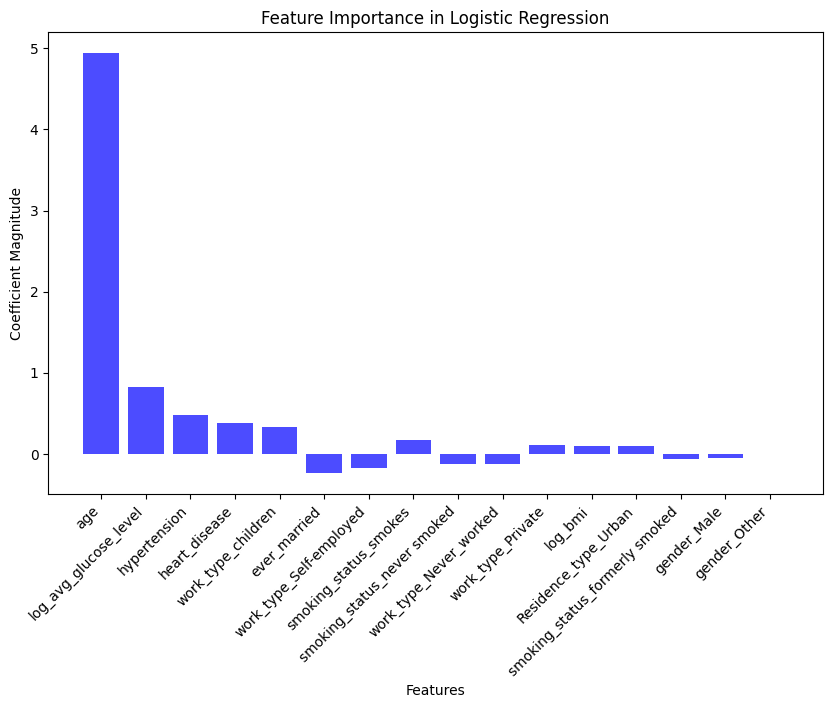

In [44]:
# Sorting coefficients by magnitude
sorted_features = sorted(feature_importance.items(), key=lambda x: abs(x[1]), reverse=True)

# Splitting keys and values
features, coeffs = zip(*sorted_features)

# Creating a bar plot
plt.figure(figsize=(10, 6))
plt.bar(features, coeffs, color='blue', alpha = 0.7)
plt.xlabel('Features')
plt.ylabel('Coefficient Magnitude')
plt.title('Feature Importance in Logistic Regression')
plt.xticks(rotation=45, ha = 'right')
plt.show()


##### XGBoost


In [45]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV


# 1. Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=42)

# 2. Create a dictionary of hyperparameters to tune
# Note that this example only contains 1 value for each parameter for simplicity,
# but you should assign a dictionary with ranges of values
cv_params = {'learning_rate': [0.1],
             'max_depth': [8],
             'min_child_weight': [2],
             'n_estimators': [500]
             }

# 3. Define a set of scoring metrics to capture
scoring = {
    'accuracy': 'accuracy',  # metric for accuracy
    'precision': 'precision',  # metric for precision
    'recall': 'recall',  # metric for recall
    'f1': 'f1'  # metric for F1 score
}
# 4. Instantiate the GridSearchCV object
xgb1 = GridSearchCV(xgb, cv_params, scoring=scoring, cv=4, refit='f1')

In [46]:
%%time
xgb1.fit(X_train, y_train)

CPU times: user 12.3 s, sys: 19.2 s, total: 31.5 s
Wall time: 2.14 s


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.1], 'max_depth': [8],
                         'min_child_weight': [2], 'n_estimators': [500]},
             refit='f1',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall'})

In [47]:
# Examine best score
xgb1.best_score_

0.08130411255411255

In [48]:
# Examine best parameters
xgb1.best_params_

{'learning_rate': 0.1,
 'max_depth': 8,
 'min_child_weight': 2,
 'n_estimators': 500}

In [49]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
    model_name (string): what you want the model to be called in the output table
    model_object: a fit GridSearchCV object
    metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                 'recall': 'mean_test_recall',
                 'f1': 'mean_test_f1',
                 'accuracy': 'mean_test_accuracy',
                 }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy],
                        },
                       )

    return table

In [50]:
xgb1_cv_results = make_results('XGB CV', xgb1, 'f1')
results = pd.concat([results, xgb1_cv_results], axis=0)
results

,model,precision,recall,F1,accuracy
0,Logistic test,0.000000,0.000000,0.000000,0.937402
0,XGB CV,0.191964,0.052879,0.081304,0.945981


In [51]:
# Get scores on test data
xgb_preds = xgb1.best_estimator_.predict(X_test)

In [52]:
# Get scores on test data
xgb_test_scores = get_test_scores('XGB test', xgb_preds, y_test)
results = pd.concat([results, xgb_test_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,Logistic test,0.000000,0.000000,0.000000,0.937402
0,XGB CV,0.191964,0.052879,0.081304,0.945981
0,XGB test,0.363636,0.100000,0.156863,0.932707


<Axes: >

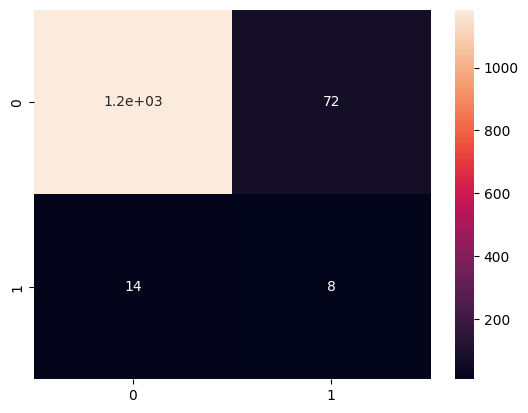

In [53]:
# Testing Set Performance
cm = confusion_matrix(xgb_preds, y_test)
sns.heatmap(cm, annot=True)

In [54]:
print(classification_report(y_test, xgb_preds))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1198
           1       0.36      0.10      0.16        80

    accuracy                           0.93      1278
   macro avg       0.65      0.54      0.56      1278
weighted avg       0.91      0.93      0.91      1278



In [55]:
importances = xgb1.best_estimator_.feature_importances_
features = df_transformed.drop(['avg_glucose_level', 'bmi', 'stroke'], axis=1).columns
feature_importance = dict(zip(features, importances))

# Display the coefficients
for feature, importance in feature_importance.items():
    print(f"{feature}: {importance}")

age: 0.1139477789402008
hypertension: 0.06855115294456482
heart_disease: 0.10831798613071442
ever_married: 0.0652577206492424
log_bmi: 0.058270931243896484
log_avg_glucose_level: 0.05663290619850159
gender_Male: 0.06245613470673561
gender_Other: 0.0
work_type_Never_worked: 0.0
work_type_Private: 0.06286007165908813
work_type_Self-employed: 0.06679801642894745
work_type_children: 0.06901063024997711
Residence_type_Urban: 0.05251277610659599
smoking_status_formerly smoked: 0.06439093500375748
smoking_status_never smoked: 0.07540994882583618
smoking_status_smokes: 0.07558295875787735


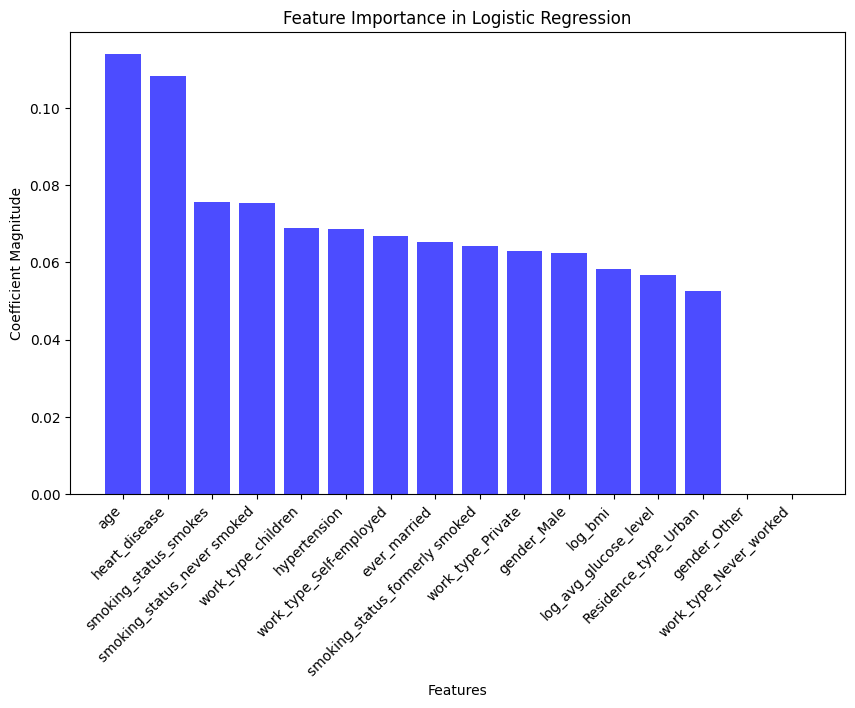

In [56]:
# Sorting coefficients by magnitude
sorted_features = sorted(feature_importance.items(), key=lambda x: abs(x[1]), reverse=True)

# Splitting keys and values
features, coeffs = zip(*sorted_features)

# Creating a bar plot
plt.figure(figsize=(10, 6))
plt.bar(features, coeffs, color='blue', alpha = 0.7)
plt.xlabel('Features')
plt.ylabel('Coefficient Magnitude')
plt.title('Feature Importance in Logistic Regression')
plt.xticks(rotation=45, ha = 'right')
plt.show()


#### Random Forest: Info, Train & Evaluate

##### Info
[Random Forest](https://www.geeksforgeeks.org/random-forest-algorithm-in-machine-learning/)


**How Does Random Forest Work?**

The random Forest algorithm works in several steps which are discussed below–>

1. Ensemble of Decision Trees: Random Forest leverages the power of ensemble learning by constructing an army of Decision Trees. These trees are like individual experts, each specializing in a particular aspect of the data. Importantly, they operate independently, minimizing the risk of the model being overly influenced by the nuances of a single tree.
2. Random Feature Selection: To ensure that each decision tree in the ensemble brings a unique perspective, Random Forest employs random feature selection. During the training of each tree, a random subset of features is chosen. This randomness ensures that each tree focuses on different aspects of the data, fostering a diverse set of predictors within the ensemble.
3. Bootstrap Aggregating or Bagging: The technique of bagging is a cornerstone of Random Forest’s training strategy which involves creating multiple bootstrap samples from the original dataset, allowing instances to be sampled with replacement. This results in different subsets of data for each decision tree, introducing variability in the training process and making the model more robust.
4. Decision Making and Voting: When it comes to making predictions, each decision tree in the Random Forest casts its vote. For classification tasks, the final prediction is determined by the mode (most frequent prediction) across all the trees. In regression tasks, the average of the individual tree predictions is taken. This internal voting mechanism ensures a balanced and collective decision-making process.

**Key Features of Random Forest**

Some of the Key Features of Random Forest are discussed below–>

1. High Predictive Accuracy: Imagine Random Forest as a team of decision-making wizards. Each wizard (decision tree) looks at a part of the problem, and together, they weave their insights into a powerful prediction tapestry. This teamwork often results in a more accurate model than what a single wizard could achieve.
2. Resistance to Overfitting: Random Forest is like a cool-headed mentor guiding its apprentices (decision trees). Instead of letting each apprentice memorize every detail of their training, it encourages a more well-rounded understanding. This approach helps prevent getting too caught up with the training data which makes the model less prone to overfitting.
3. Large Datasets Handling: Dealing with a mountain of data? Random Forest tackles it like a seasoned explorer with a team of helpers (decision trees). Each helper takes on a part of the dataset, ensuring that the expedition is not only thorough but also surprisingly quick.
4. Variable Importance Assessment: Think of Random Forest as a detective at a crime scene, figuring out which clues (features) matter the most. It assesses the importance of each clue in solving the case, helping you focus on the key elements that drive predictions.
5. Built-in Cross-Validation: Random Forest is like having a personal coach that keeps you in check. As it trains each decision tree, it also sets aside a secret group of cases (out-of-bag) for testing. This built-in validation ensures your model doesn’t just ace the training but also performs well on new challenges.
6. Handling Missing Values: Life is full of uncertainties, just like datasets with missing values. Random Forest is the friend who adapts to the situation, making predictions using the information available. It doesn’t get flustered by missing pieces; instead, it focuses on what it can confidently tell us.
7. Parallelization for Speed: Random Forest is your time-saving buddy. Picture each decision tree as a worker tackling a piece of a puzzle simultaneously. This parallel approach taps into the power of modern tech, making the whole process faster and more efficient for handling large-scale projects.

**Preparing Data for Random Forest Modeling**

For Random Forest modeling, some key-steps of data preparation are discussed below:

1. Handling Missing Values: Begin by addressing any missing values in the dataset. Techniques like imputation or removal of instances with missing values ensure a complete and reliable input for Random Forest.
2. Encoding Categorical Variables: Random Forest requires numerical inputs, so categorical variables need to be encoded. Techniques like one-hot encoding or label encoding transform categorical features into a format suitable for the algorithm.
3. Scaling and Normalization: While Random Forest is not sensitive to feature scaling, normalizing numerical features can still contribute to a more efficient training process and improved convergence.
4. Feature Selection: Assess the importance of features within the dataset. Random Forest inherently provides a feature importance score, aiding in the selection of relevant features for model training.
5. Addressing Imbalanced Data: If dealing with imbalanced classes, implement techniques like adjusting class weights or employing resampling methods to ensure a balanced representation during training.

![Random Forest](Images/Random_Forest.png)

##### Fine-tune random forest

In [57]:
from sklearn.ensemble import RandomForestClassifier

# 1. Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=42)

# 2. Create a dictionary of hyperparameters to tune
# Note that this example only contains 1 value for each parameter for simplicity,
# but you should ideally test a range of values for at least some parameters
cv_params = {
    'max_depth': [None],  # You might want to try different values like 10, 20, 30 etc.
    'max_features': [1.0],  # 1 uses all features, can try fractions like 0.5, 0.8
    'max_samples': [0.7],  # Percentage of samples used to fit each tree
    'min_samples_leaf': [1],  # Minimum number of samples required at each leaf node
    'min_samples_split': [2],  # Minimum number of samples required to split an internal node
    'n_estimators': [300]  # Number of trees in the forest
}

# 3. Define a set of scoring metrics to capture
scoring = {
    'accuracy': 'accuracy',  # metric for accuracy
    'precision': 'precision',  # metric for precision
    'recall': 'recall',  # metric for recall
    'f1': 'f1'  # metric for F1 score
}

# 4. Instantiate the GridSearchCV object with corrected scoring
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='f1')

In [58]:
%%time
rf1.fit(X_train, y_train)

/opt/miniconda3/envs/DSProjects/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


CPU times: user 4.39 s, sys: 14.8 ms, total: 4.4 s
Wall time: 4.11 s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None], 'max_features': [1.0],
                         'max_samples': [0.7], 'min_samples_leaf': [1],
                         'min_samples_split': [2], 'n_estimators': [300]},
             refit='f1',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall'})

In [59]:
# Examine best score
rf1.best_score_

0.022539682539682537

In [60]:
rf1.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [61]:
rf1_cv_results = make_results('RF CV', rf1, 'f1')
results = pd.concat([results, rf1_cv_results], axis=0)
results

,model,precision,recall,F1,accuracy
0,Logistic test,0.000000,0.000000,0.000000,0.937402
0,XGB CV,0.191964,0.052879,0.081304,0.945981
0,XGB test,0.363636,0.100000,0.156863,0.932707
0,RF CV,0.266667,0.011943,0.022540,0.955375


In [62]:
rf_preds = rf1.best_estimator_.predict(X_test)

In [63]:
# Get scores on test data
rf_test_scores = get_test_scores('RF test', rf_preds, y_test)
results = pd.concat([results, rf_test_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,Logistic test,0.000000,0.000000,0.000000,0.937402
0,XGB CV,0.191964,0.052879,0.081304,0.945981
0,XGB test,0.363636,0.100000,0.156863,0.932707
0,RF CV,0.266667,0.011943,0.022540,0.955375
0,RF test,0.000000,0.000000,0.000000,0.936620


<Axes: >

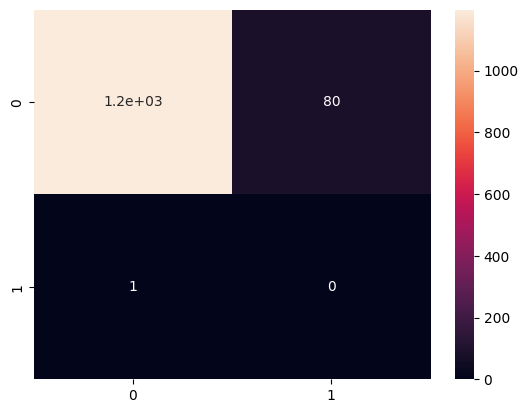

In [64]:
# Testing Set Performance
cm = confusion_matrix(rf_preds, y_test)
sns.heatmap(cm, annot=True)

In [65]:
print(classification_report(y_test, rf_preds))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1198
           1       0.00      0.00      0.00        80

    accuracy                           0.94      1278
   macro avg       0.47      0.50      0.48      1278
weighted avg       0.88      0.94      0.91      1278



#### Neural Networks: Info, Train & Evaluate

##### Info

##### Train & Evaluate

In [66]:
import tensorflow as tf

In [67]:
# Define the model
"""
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

# Compile the model (assuming binary classification)
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Summary of the model to see the structure and number of parameters
model.summary()       
"""

"\nmodel = tf.keras.models.Sequential([\n    tf.keras.layers.Input(shape=(X_train.shape[1],)),\n    tf.keras.layers.Dense(units=256, activation='relu'),\n    tf.keras.layers.BatchNormalization(),\n    tf.keras.layers.Dropout(0.3),\n    tf.keras.layers.Dense(units=128, activation='relu'),\n    tf.keras.layers.BatchNormalization(),\n    tf.keras.layers.Dropout(0.3),\n    tf.keras.layers.Dense(units=64, activation='relu'),\n    tf.keras.layers.BatchNormalization(),\n    tf.keras.layers.Dropout(0.3),\n    tf.keras.layers.Dense(units=1, activation='sigmoid')\n])\n\n# Compile the model (assuming binary classification)\nmodel.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),\n              loss='binary_crossentropy',\n              metrics=['accuracy'])\n\n# Summary of the model to see the structure and number of parameters\nmodel.summary()       \n"

In [68]:
"""
%%time
epochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size = 50, verbose=1)
"""

'\n%%time\nepochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size = 50, verbose=1)\n'

In [69]:
import pickle 

# Define a path to the folder where you want to save the model
path = '/Users/thientvu/Desktop/Data_Science_Projects/Projects/Stroke_Prediction/'

In [70]:
def write_pickle(path, model_object, save_name:str):
    '''
    save_name is a string.
    '''
    with open(path + save_name + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [71]:
#write_pickle(path, model, "NNClassifier")

In [72]:
def read_pickle(path, saved_model_name:str):
    '''
    saved_model_name is a string.
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

        return model

In [73]:
read_pickle(path, "NNClassifier")

<Sequential name=sequential, built=True>

In [74]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

In [75]:
y_pred

array([False, False, False, ..., False, False, False])

In [78]:
#epochs_hist.history.keys()

In [79]:
"""
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])
"""

"\nplt.plot(epochs_hist.history['loss'])\nplt.title('Model Loss Progress During Training')\nplt.xlabel('Epoch')\nplt.ylabel('Training Loss')\nplt.legend(['Training Loss'])\n"

In [80]:
"""
plt.plot(epochs_hist.history['accuracy'])
plt.title('Model Accuracy Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.legend(['Training Accuracy'])
"""

"\nplt.plot(epochs_hist.history['accuracy'])\nplt.title('Model Accuracy Progress During Training')\nplt.xlabel('Epoch')\nplt.ylabel('Training Accuracy')\nplt.legend(['Training Accuracy'])\n"

In [81]:
# Get scores on test data
nn_test_scores = get_test_scores('NN test', y_pred, y_test)
results = pd.concat([results, nn_test_scores], axis=0)
results

/opt/miniconda3/envs/DSProjects/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,model,precision,recall,F1,accuracy
0,Logistic test,0.000000,0.000000,0.000000,0.937402
0,XGB CV,0.191964,0.052879,0.081304,0.945981
0,XGB test,0.363636,0.100000,0.156863,0.932707
0,RF CV,0.266667,0.011943,0.022540,0.955375
0,RF test,0.000000,0.000000,0.000000,0.936620
0,NN test,0.000000,0.000000,0.000000,0.937402


<Axes: >

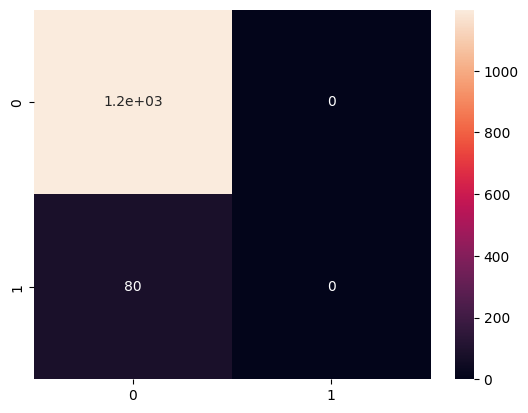

In [82]:
# Testing Set Performance
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)


In [83]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1198
           1       0.00      0.00      0.00        80

    accuracy                           0.94      1278
   macro avg       0.47      0.50      0.48      1278
weighted avg       0.88      0.94      0.91      1278



/opt/miniconda3/envs/DSProjects/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/envs/DSProjects/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/envs/DSProjects/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

### Transform Data for Tableau Dashboard

In [88]:
df_cleaned.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,log_bmi,log_avg_glucose_level
0,Male,67.0,0,1,1,Private,Urban,228.69,36.600000,formerly smoked,1,3.600048,5.432367
1,Female,61.0,0,0,1,Self-employed,Rural,202.21,28.893237,never smoked,1,3.363608,5.309307
2,Male,80.0,0,1,1,Private,Rural,105.92,32.500000,never smoked,1,3.481240,4.662684
3,Female,49.0,0,0,1,Private,Urban,171.23,34.400000,smokes,1,3.538057,5.143008
4,Female,79.0,1,0,1,Self-employed,Rural,174.12,24.000000,never smoked,1,3.178054,5.159745


In [89]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 5110 non-null   object 
 1   age                    5110 non-null   float64
 2   hypertension           5110 non-null   int64  
 3   heart_disease          5110 non-null   int64  
 4   ever_married           5110 non-null   int64  
 5   work_type              5110 non-null   object 
 6   Residence_type         5110 non-null   object 
 7   avg_glucose_level      5110 non-null   float64
 8   bmi                    5110 non-null   float64
 9   smoking_status         5110 non-null   object 
 10  stroke                 5110 non-null   int64  
 11  log_bmi                5110 non-null   float64
 12  log_avg_glucose_level  5110 non-null   float64
dtypes: float64(5), int64(4), object(4)
memory usage: 519.1+ KB


In [90]:
df_export = df_cleaned.drop(['log_bmi', 'log_avg_glucose_level'], axis=1)

In [91]:
df_export.to_csv('Data/cleaned_data.csv', index=False)


### Tableau Dashboard

![Taleau Dashboard](Images/Dashboard2.png)